In [1]:
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.sparse as sparse
from scipy.stats import norm, skew
from scipy import stats
from scipy.sparse.linalg import spsolve
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

## 1. Loading Data

In [2]:
df = pd.read_csv('Downloads/TASK 1/installs_download.csv', sep=",")

In [3]:
df.head()

,msisdn,timeline,timestamp,event_type,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,...,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,b0c89e6222030d07623bbdfcd802068a,1.560000e+12,2019-07-01T20:01:54.000Z,install,All your favorite songs in just one place! Dow...,2098.40,0.0,0.0,0.00,0.0,...,M,No,south south,akwa ibom,oron,tecno,f1,Smartphone,google,android
1,8dbe350a0864243bcbcab192c11afb1c,1.560000e+12,2019-07-27T12:45:55.000Z,install,All your favourite songs in just one place! Do...,5361.80,510.0,156.0,2933.86,2000.0,...,M,No,south west,lagos,ikeja,nokia,105 ds (ta1034),Feature Phone,symbian,symbian os
2,e9494ef7df151115dd00cb9e0cd75b28,1.560000e+12,2019-06-09T09:13:49,install,Did you know you can listen to Kwam1 straight ...,6000.26,240.0,24.0,2545.11,1000.0,...,M,No,south west,lagos,kosofe,nokia,3.1 ss (ta1057),Smartphone,google,android
3,3b17282522ff95f763243d9a87f25e01,1.560000e+12,2019-07-08T17:55:46.000Z,install,Listen to the latest hit songs from favourite ...,4202.00,0.0,24.0,1098.80,0.0,...,M,No,south east,abia,aba south,tecno,la7,Smartphone,google,android
4,e14725c65cb0a904d83fa6d5990244d6,1.560000e+12,2019-07-03T17:56:12.000Z,install,All your favorite songs in just one place! Dow...,434.44,0.0,0.0,0.00,0.0,...,M,No,south east,imo,owerri municipal,tecno,f2,Smartphone,google,android


In [8]:
df.shape

(65591, 24)

In [9]:
df['conversion'] = df['event_type'].apply(lambda x: 0 if x == 'click' else 1)

In [10]:
df.head()

,msisdn,timeline,timestamp,event_type,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,...,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,conversion
0,b0c89e6222030d07623bbdfcd802068a,1.560000e+12,2019-07-01T20:01:54.000Z,install,All your favorite songs in just one place! Dow...,2098.40,0.0,0.0,0.00,0.0,...,No,south south,akwa ibom,oron,tecno,f1,Smartphone,google,android,1
1,8dbe350a0864243bcbcab192c11afb1c,1.560000e+12,2019-07-27T12:45:55.000Z,install,All your favourite songs in just one place! Do...,5361.80,510.0,156.0,2933.86,2000.0,...,No,south west,lagos,ikeja,nokia,105 ds (ta1034),Feature Phone,symbian,symbian os,1
2,e9494ef7df151115dd00cb9e0cd75b28,1.560000e+12,2019-06-09T09:13:49,install,Did you know you can listen to Kwam1 straight ...,6000.26,240.0,24.0,2545.11,1000.0,...,No,south west,lagos,kosofe,nokia,3.1 ss (ta1057),Smartphone,google,android,1
3,3b17282522ff95f763243d9a87f25e01,1.560000e+12,2019-07-08T17:55:46.000Z,install,Listen to the latest hit songs from favourite ...,4202.00,0.0,24.0,1098.80,0.0,...,No,south east,abia,aba south,tecno,la7,Smartphone,google,android,1
4,e14725c65cb0a904d83fa6d5990244d6,1.560000e+12,2019-07-03T17:56:12.000Z,install,All your favorite songs in just one place! Dow...,434.44,0.0,0.0,0.00,0.0,...,No,south east,imo,owerri municipal,tecno,f2,Smartphone,google,android,1


## 2. Data Analysis

In [11]:
list(df.columns)

['msisdn',
 'timeline',
 'timestamp',
 'event_type',
 'ad_text',
 'spend_total',
 'spend_vas',
 'sms_cost',
 'spend_voice',
 'spend_data',
 'customer_class',
 'customer_value',
 'age',
 'gender',
 'has_bank',
 'location_region',
 'location_state',
 'location_lga',
 'device_manufacturer',
 'device_model',
 'device_type',
 'os_vendor',
 'os_name',
 'conversion']

In [12]:
df.nunique()

msisdn                 62607
timeline                   1
timestamp              62563
event_type                 2
ad_text                   62
spend_total            49733
spend_vas               1419
sms_cost                1938
spend_voice            30138
spend_data              1790
customer_class            32
customer_value             5
age                       99
gender                     2
has_bank                   2
location_region            6
location_state            37
location_lga             737
device_manufacturer      471
device_model            4033
device_type                2
os_vendor                224
os_name                  148
conversion                 2
dtype: int64

In [13]:
df.isnull().sum()

msisdn                     0
timeline                 918
timestamp                  0
event_type                 0
ad_text                    0
spend_total              355
spend_vas              16137
sms_cost               16137
spend_voice            16137
spend_data             16137
customer_class           355
customer_value           355
age                      351
gender                  1124
has_bank                  59
location_region         5601
location_state          5601
location_lga            4028
device_manufacturer     1091
device_model            1160
device_type             1486
os_vendor               1375
os_name                 1364
conversion                 0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65591 entries, 0 to 65590
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   msisdn               65591 non-null  object 
 1   timeline             64673 non-null  float64
 2   timestamp            65591 non-null  object 
 3   event_type           65591 non-null  object 
 4   ad_text              65591 non-null  object 
 5   spend_total          65236 non-null  float64
 6   spend_vas            49454 non-null  float64
 7   sms_cost             49454 non-null  float64
 8   spend_voice          49454 non-null  float64
 9   spend_data           49454 non-null  float64
 10  customer_class       65236 non-null  float64
 11  customer_value       65236 non-null  object 
 12  age                  65240 non-null  float64
 13  gender               64467 non-null  object 
 14  has_bank             65532 non-null  object 
 15  location_region      59990 non-null 

In [15]:
df.loc[:, "age"].replace(2020,20, inplace = True)

In [16]:
# convert timestamp to date format

df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

,msisdn,timeline,timestamp,event_type,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,...,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,conversion
0,b0c89e6222030d07623bbdfcd802068a,1.560000e+12,2019-07-01 20:01:54+00:00,install,All your favorite songs in just one place! Dow...,2098.40,0.0,0.0,0.00,0.0,...,No,south south,akwa ibom,oron,tecno,f1,Smartphone,google,android,1
1,8dbe350a0864243bcbcab192c11afb1c,1.560000e+12,2019-07-27 12:45:55+00:00,install,All your favourite songs in just one place! Do...,5361.80,510.0,156.0,2933.86,2000.0,...,No,south west,lagos,ikeja,nokia,105 ds (ta1034),Feature Phone,symbian,symbian os,1
2,e9494ef7df151115dd00cb9e0cd75b28,1.560000e+12,2019-06-09 09:13:49,install,Did you know you can listen to Kwam1 straight ...,6000.26,240.0,24.0,2545.11,1000.0,...,No,south west,lagos,kosofe,nokia,3.1 ss (ta1057),Smartphone,google,android,1
3,3b17282522ff95f763243d9a87f25e01,1.560000e+12,2019-07-08 17:55:46+00:00,install,Listen to the latest hit songs from favourite ...,4202.00,0.0,24.0,1098.80,0.0,...,No,south east,abia,aba south,tecno,la7,Smartphone,google,android,1
4,e14725c65cb0a904d83fa6d5990244d6,1.560000e+12,2019-07-03 17:56:12+00:00,install,All your favorite songs in just one place! Dow...,434.44,0.0,0.0,0.00,0.0,...,No,south east,imo,owerri municipal,tecno,f2,Smartphone,google,android,1


In [17]:
# so we will replace missing values with 'None' and '0'

df.loc[:,"timeline"].replace(np.nan,0,inplace=True)
df.loc[:,"spend_total"].replace(np.nan,0,inplace=True)
df.loc[:,"spend_vas"].replace(np.nan,0,inplace=True)
df.loc[:,"sms_cost"].replace(np.nan,0,inplace=True)
df.loc[:,"spend_voice"].replace(np.nan,0,inplace=True)
df.loc[:,"spend_data"].replace(np.nan,0,inplace=True)
df.loc[:,"customer_class"].replace(np.nan,0,inplace=True)
df.loc[:,"customer_value"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"age"].replace(np.nan,0,inplace=True)
df.loc[:,"gender"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"has_bank"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"location_region"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"location_state"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"location_lga"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"device_manufacturer"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"device_model"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"device_type"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"os_vendor"].replace(np.nan,"Unknown",inplace=True)
df.loc[:,"os_name"].replace(np.nan,"Unknown",inplace=True)

In [18]:
df.isnull().sum()

msisdn                 0
timeline               0
timestamp              0
event_type             0
ad_text                0
spend_total            0
spend_vas              0
sms_cost               0
spend_voice            0
spend_data             0
customer_class         0
customer_value         0
age                    0
gender                 0
has_bank               0
location_region        0
location_state         0
location_lga           0
device_manufacturer    0
device_model           0
device_type            0
os_vendor              0
os_name                0
conversion             0
dtype: int64

In [19]:
df['conversion'].value_counts()

0    63243
1     2348
Name: conversion, dtype: int64

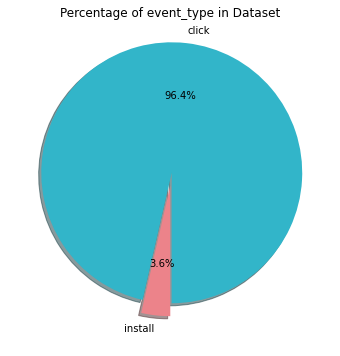

In [20]:
from pylab import rcParams

# Data to plot
sizes = df['event_type'].value_counts(sort = True)
colors = ["#32B5C9","#ec838a"] 
rcParams['figure.figsize'] = 10,6
explode = (0.1, 0)  # explode 1st slice
labels = "click","install"

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of event_type in Dataset')
plt.show()

### Conversion Rate

In [21]:
conversion_rate_df = pd.DataFrame(
    df.groupby('conversion').count()['event_type'] / df.shape[0] * 100.0)

In [22]:
conversion_rate_df

,event_type
conversion,
0,96.420241
1,3.579759


In [23]:
conversion_rate_df.T

conversion,0,1
event_type,96.420241,3.579759


### Conversion Rates by Customer Value

In [24]:
conversion_rate_by_customer_value = df.groupby(
    by='customer_value'
)['conversion'].sum() / df.groupby(
    by='customer_value'
)['conversion'].count() * 100.0

,conversion,percent,conversion rate
customer_value,,,
high,703,29.94,4.538119
medium,553,23.55,3.283068
low,485,20.66,2.665714
very high,446,18.99,4.939092
top,148,6.30,2.607011
Unknown,13,0.55,3.661972


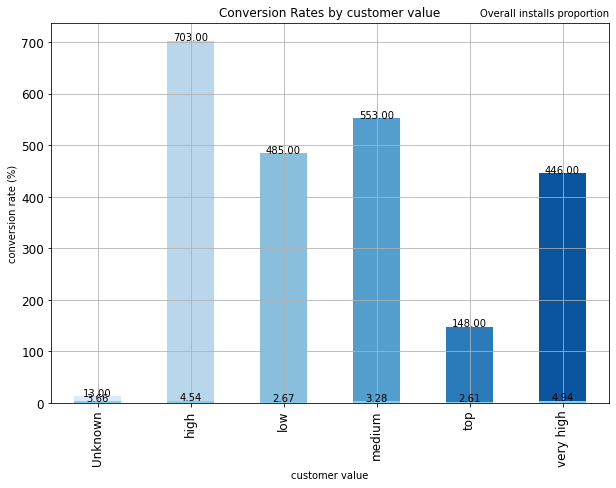

In [25]:
import seaborn as sns

# side table
installs = df.groupby(["customer_value"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='customer_value'
)['conversion'].sum() / df.groupby(
    by='customer_value'
)['conversion'].count() * 100.0

display(installs)


ax = df.groupby(["customer_value"])["conversion"].sum().plot(kind="bar", figsize=(10,7), fontsize=12, color=sns.color_palette("Blues"), table=False)

# Params
plt.xlabel("customer_value", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall installs proportion", fontsize=10, loc="right")

bx = conversion_rate_by_customer_value.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by customer value'
)

for bar in bx.patches:
    value = bar.get_height()
    text = f'{value :1.2f}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + value
    bx.text(text_x, text_y, text, ha='center',size=10)

bx.set_xlabel('customer value')
bx.set_ylabel('conversion rate (%)')

plt.show()

In [30]:
TR = df.groupby(["has_bank"])["spend_data"].describe()
TR=TR.transpose()
TR

has_bank,No,Unknown,Yes
count,62822.000000,59.0,2710.000000
mean,336.210053,0.0,855.650209
std,944.490151,0.0,1882.543798
min,0.000000,0.0,0.000000
25%,0.000000,0.0,0.000000
50%,0.000000,0.0,0.000000
75%,25.000000,0.0,1000.000000
max,31796.960000,0.0,40801.680000


### Conversion Rates by Having a Bank Acc

In [23]:
conversion_rate_by_has_bank = df.groupby(
    by='has_bank'
)['conversion'].sum() / df.groupby(
    by='has_bank'
)['conversion'].count() * 100.0

,conversion,percent,conversion rate
has_bank,,,
No,2208,94.04,3.514692
Yes,138,5.88,5.092251
Unknown,2,0.09,3.389831


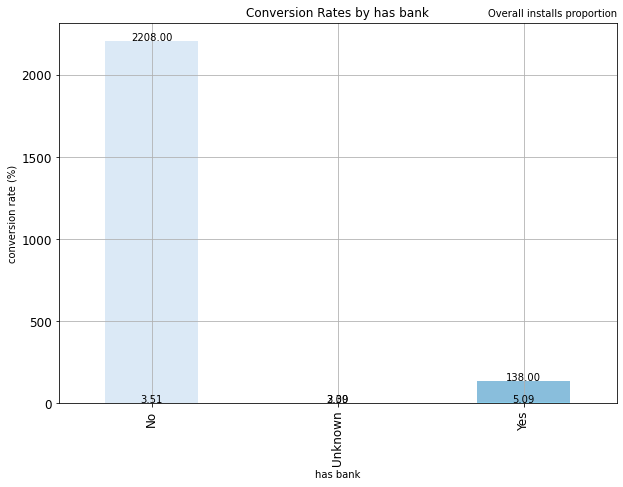

In [24]:
# side table
installs = df.groupby(["has_bank"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='has_bank'
)['conversion'].sum() / df.groupby(
    by='has_bank'
)['conversion'].count() * 100.0

display(installs)


ax = df.groupby(["has_bank"])["conversion"].sum().plot(kind="bar", figsize=(10,7), fontsize=12, color=sns.color_palette("Blues"), table=False)

# Params
plt.xlabel("has_bank", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall installs proportion", fontsize=10, loc="right")

bx = conversion_rate_by_has_bank.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by has bank'
)

for bar in bx.patches:
    value = bar.get_height()
    text = f'{value :1.2f}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + value
    bx.text(text_x, text_y, text, ha='center',size=10)

bx.set_xlabel('has bank')
bx.set_ylabel('conversion rate (%)')

plt.show()

### Conversion Rates by Location Region

In [25]:
conversion_rate_by_location_region = df.groupby(
    by='location_region'
)['conversion'].sum() / df.groupby(
    by='location_region'
)['conversion'].count() * 100.0

,conversion,percent,conversion rate
location_region,,,
south west,818,34.84,3.010452
north central,418,17.80,4.147648
south south,355,15.12,4.236277
south east,284,12.10,4.099307
Unknown,200,8.52,3.570791
north west,160,6.81,3.218668
north east,113,4.81,4.591629


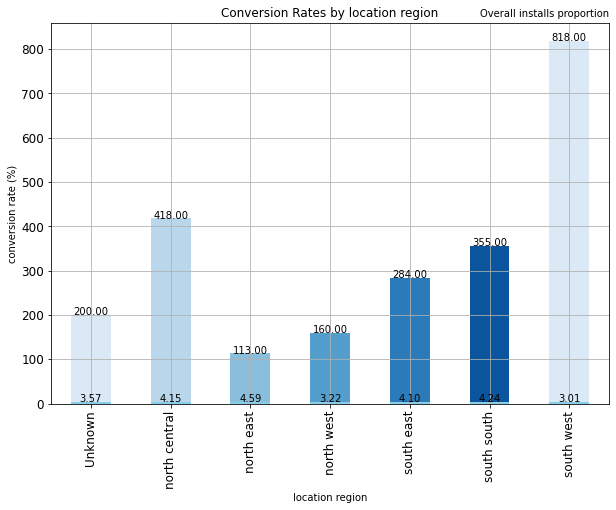

In [26]:
# side table
installs = df.groupby(["location_region"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='location_region'
)['conversion'].sum() / df.groupby(
    by='location_region'
)['conversion'].count() * 100.0

display(installs)


ax = df.groupby(["location_region"])["conversion"].sum().plot(kind="bar", figsize=(10,7), fontsize=12, color=sns.color_palette("Blues"), table=False)

# Params
plt.xlabel("location_region", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall installs proportion", fontsize=10, loc="right")

bx = conversion_rate_by_location_region.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by location region'
)

for bar in bx.patches:
    value = bar.get_height()
    text = f'{value :1.2f}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + value
    bx.text(text_x, text_y, text, ha='center',size=10)

bx.set_xlabel('location region')
bx.set_ylabel('conversion rate (%)')

plt.show()

### Conversion Rates by Location State

In [27]:
conversion_rate_by_location_state = df.groupby(
    by='location_state'
)['conversion'].sum() / df.groupby(
    by='location_state'
)['conversion'].count() * 100.0

,conversion,percent,conversion rate
location_state,,,
lagos,515,21.93,3.006071
Unknown,200,8.52,3.570791
fct,193,8.22,3.861545
rivers,118,5.03,3.894389
delta,95,4.05,4.634146
enugu,95,4.05,5.532906
ogun,89,3.79,2.306895
oyo,87,3.71,4.605611
anambra,70,2.98,3.441495


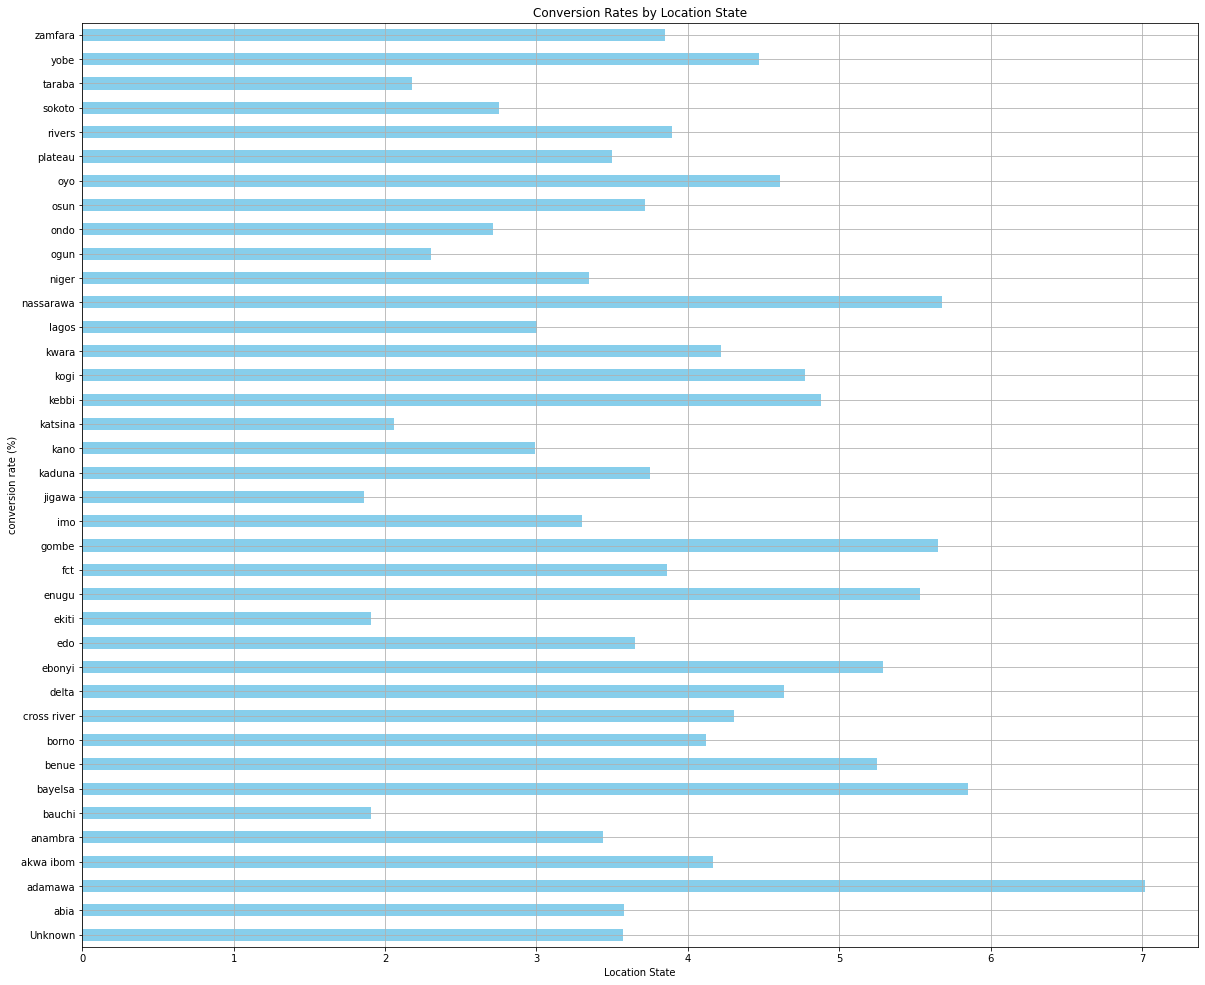

In [28]:
installs = df.groupby(["location_state"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='location_state'
)['conversion'].sum() / df.groupby(
    by='location_state'
)['conversion'].count() * 100.0

display(installs)
ax = conversion_rate_by_location_state.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(20, 17),
    title='Conversion Rates by Location State'
)

ax.set_xlabel('Location State')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Conversion Rates by Device Type

In [29]:
conversion_rate_by_device_type = df.groupby(
    by='device_type'
)['conversion'].sum() / df.groupby(
    by='device_type'
)['conversion'].count() * 100.0

,conversion,percent,conversion rate
device_type,,,
Smartphone,2092,89.10,3.766248
Feature Phone,203,8.65,2.371772
Unknown,53,2.26,3.566622


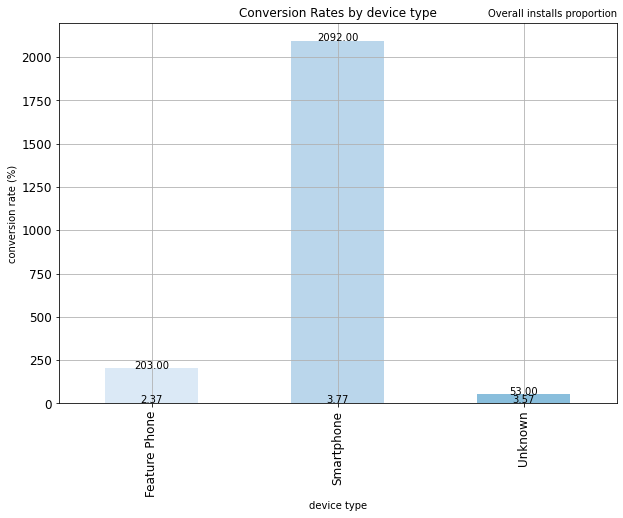

In [30]:
# side table
installs = df.groupby(["device_type"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='device_type'
)['conversion'].sum() / df.groupby(
    by='device_type'
)['conversion'].count() * 100.0

display(installs)

ax = df.groupby(["device_type"])["conversion"].sum().plot(kind="bar", figsize=(10,7), fontsize=12, color=sns.color_palette("Blues"), table=False)

# Params
plt.xlabel("device_type", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall installs proportion", fontsize=10, loc="right")

bx = conversion_rate_by_device_type.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by device type'
)

for bar in bx.patches:
    value = bar.get_height()
    text = f'{value :1.2f}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + value
    bx.text(text_x, text_y, text, ha='center',size=10)

bx.set_xlabel('device type')
bx.set_ylabel('conversion rate (%)')

plt.show()

### Conversion Rates by Customer Class

In [31]:
conversion_rate_by_customer_class = df.groupby(
    by='customer_class'
)['conversion'].sum() / df.groupby(
    by='customer_class'
)['conversion'].count() * 100.0

,conversion,percent,conversion rate
customer_class,,,
46.0,849,36.16,3.065978
44.0,609,25.94,3.920685
49.0,450,19.17,4.403993
42.0,125,5.32,4.220122
186.0,102,4.34,3.920061
26.0,72,3.07,3.915171
185.0,41,1.75,4.334038
19.0,36,1.53,2.261307
403.0,15,0.64,3.105590


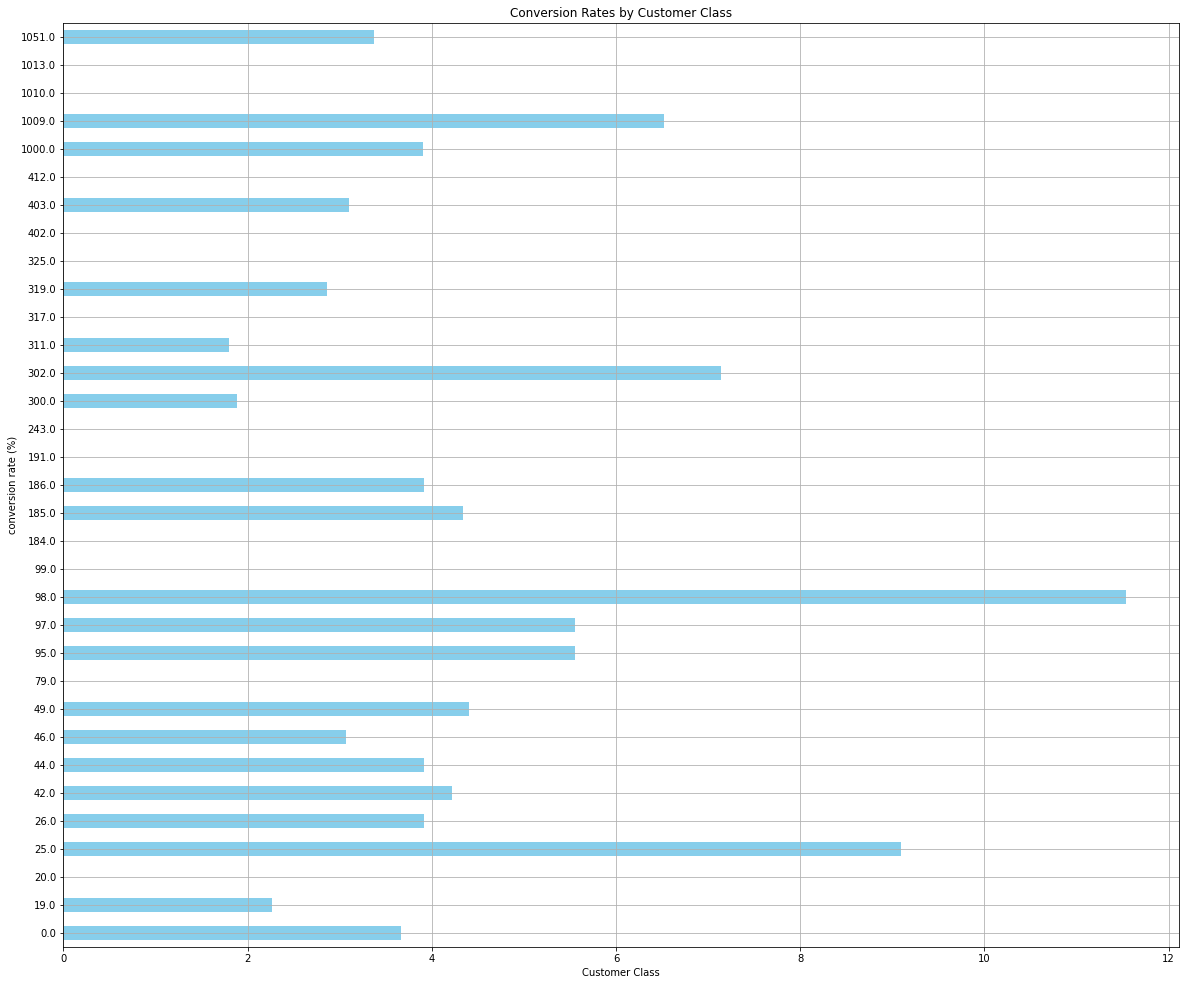

In [32]:
# side table
installs = df.groupby(["customer_class"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='customer_class'
)['conversion'].sum() / df.groupby(
    by='customer_class'
)['conversion'].count() * 100.0

display(installs)


ax = conversion_rate_by_customer_class.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(20, 17),
    title='Conversion Rates by Customer Class'
)

ax.set_xlabel('Customer Class')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Conversion Rates by Gender

In [33]:
conversion_rate_by_gender = df.groupby(
    by='gender'
)['conversion'].sum() / df.groupby(
    by='gender'
)['conversion'].count() * 100.0

,conversion,percent,conversion rate
gender,,,
M,1841,78.41,4.229559
F,470,20.02,2.244508
Unknown,37,1.58,3.291815


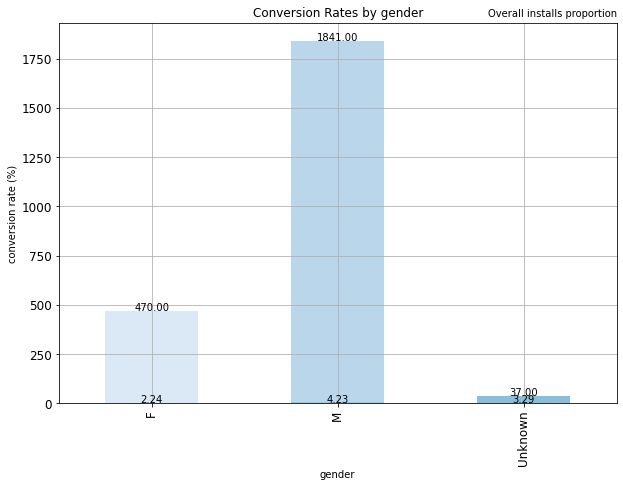

In [34]:
# side table
installs = df.groupby(["gender"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='gender'
)['conversion'].sum() / df.groupby(
    by='gender'
)['conversion'].count() * 100.0

display(installs)

ax = df.groupby(["gender"])["conversion"].sum().plot(kind="bar", figsize=(10,7), fontsize=12, color=sns.color_palette("Blues"), table=False)

# Params
plt.xlabel("gender", fontsize=10)
plt.xticks(rotation=0, horizontalalignment="center")
plt.ylabel("Absolute frequency", fontsize=10)
plt.title("Overall installs proportion", fontsize=10, loc="right")

bx = conversion_rate_by_gender.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by gender'
)

for bar in bx.patches:
    value = bar.get_height()
    text = f'{value :1.2f}'
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + value
    bx.text(text_x, text_y, text, ha='center',size=10)

bx.set_xlabel('gender')
bx.set_ylabel('conversion rate (%)')

plt.show()

### Conversion Rates by ad text

In [35]:
# side table
installs = df.groupby(["ad_text"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["percent"] = (installs.apply(lambda x: x/x.sum())*100).round(2)
installs['conversion rate'] = df.groupby(
    by='ad_text'
)['conversion'].sum() / df.groupby(
    by='ad_text'
)['conversion'].count() * 100.0

display(installs)

,conversion,percent,conversion rate
ad_text,,,
All your favorite songs in just one place! Download UduX to get started,1087,46.29,9.052298
Listen to the latest hit songs from favourite artiste on UduX straight from your phone. Start 30days free trial now! Download here,651,27.73,4.191347
All your favourite songs in just one place! Download uduX to get started.,326,13.88,8.141858
Did you know you can listen to Kwam1 straight from your phone for FREE? Download uduX app now to get started.,57,2.43,13.801453
Did you know you can listen to Kwam1 straight from your phone?\nDownload the app now to get started.,38,1.62,17.511521
...,...,...,...
Listen to the hottest street jams from Obesere on uduX straight from your phone. Don't dull! Download the app now to get started:,0,0.00,0.000000
Listen to the latest hit songs from your favorite artists straight from your phone on Habari! Enjoy the first 7 days free. Start Here,0,0.00,0.000000
"Enjoy God's presence this evening by listening to gospel hits from Kirk Franklin, Chris Tomlin and more on UduX straight from your phone. D",0,0.00,0.000000


### Calculating overall spent on Conversion and non-Conversion

In [36]:
df['non-conversion'] = df['event_type'].apply(lambda x: 0 if x == 'install' else 1)

Tspc = df['spend_total']*df['non-conversion']
Tspi = df['spend_total']*df['conversion']

print('Total spent on non-conversion: #',int(Tspc.sum()))
print('Total spent on conversion: #',int(Tspi.sum()))

Total spent on non-conversion: # 342399269
Total spent on conversion: # 10692951


### Conversion by day, month and year

#### Splitting our Timestamp to Date and Tiime columns

In [37]:
import time
from datetime import datetime
from time import time

df['Date'] = [d.date() for d in df['timestamp']]
df['Time'] = [d.time() for d in df['timestamp']]

In [38]:
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [39]:
df.drop(['timestamp', 'Date'], axis=1, inplace = True)
df.head()

,msisdn,timeline,event_type,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,...,device_model,device_type,os_vendor,os_name,conversion,non-conversion,Time,Day,Month,Year
0,b0c89e6222030d07623bbdfcd802068a,1.560000e+12,install,All your favorite songs in just one place! Dow...,2098.40,0.0,0.0,0.00,0.0,19.0,...,f1,Smartphone,google,android,1,0,20:01:54,1,7,2019
1,8dbe350a0864243bcbcab192c11afb1c,1.560000e+12,install,All your favourite songs in just one place! Do...,5361.80,510.0,156.0,2933.86,2000.0,42.0,...,105 ds (ta1034),Feature Phone,symbian,symbian os,1,0,12:45:55,27,7,2019
2,e9494ef7df151115dd00cb9e0cd75b28,1.560000e+12,install,Did you know you can listen to Kwam1 straight ...,6000.26,240.0,24.0,2545.11,1000.0,46.0,...,3.1 ss (ta1057),Smartphone,google,android,1,0,09:13:49,9,6,2019
3,3b17282522ff95f763243d9a87f25e01,1.560000e+12,install,Listen to the latest hit songs from favourite ...,4202.00,0.0,24.0,1098.80,0.0,49.0,...,la7,Smartphone,google,android,1,0,17:55:46,8,7,2019
4,e14725c65cb0a904d83fa6d5990244d6,1.560000e+12,install,All your favorite songs in just one place! Dow...,434.44,0.0,0.0,0.00,0.0,46.0,...,f2,Smartphone,google,android,1,0,17:56:12,3,7,2019


In [40]:
df.groupby('Year').count()['conversion']

Year
2019    64673
2020      918
Name: conversion, dtype: int64

In [41]:
df.groupby('Month').count()['conversion']

Month
1       229
2       109
3       105
4        97
5       929
6     15323
7     45583
8      2368
9       782
10       22
11       30
12       14
Name: conversion, dtype: int64

## Number of campaigns that have provided installs above the average

,conversion,percent,cumsum
ad_text,,,
Enjoy your evening with oldies hits straight from your phone on UduX. Download the app now to get started.,0.600000,9.15,9.15
"Did you know you can listen to Kwam1, Obesere and other fuji artists straight from your phone?\nDownload the app now to get started.",0.428571,6.54,15.69
Enjoy your morning with old school music hits straight from your phone on UduX. Download the app now to get started.,0.346154,5.28,20.97
Enjoy old school music hits straight from your phone on UduX. Download the app now to get started.,0.333333,5.08,26.05
Start your day with Jcole's music and more on UduX. Download the app now to get started.,0.333333,5.08,31.13
"Listen to your favourite gospel hits from Chioma Jesus, Kirk Franklin and more on UduX straight from your phone. Download the app now:",0.314286,4.79,35.92
Did you know you can listen to Kwam1 straight from your phone?\nDownload the app now to get started.\n,0.291667,4.45,40.37
Enjoy Jcole's music and more on UduX. Download the app now to get started,0.285714,4.36,44.73
Listen to evergreen jams from K1 De Ultimate on UduX straight from your phone. Don't dull! Download the app now to get started,0.263158,4.01,48.74


ad_text Average installs: 0.1057317399972956


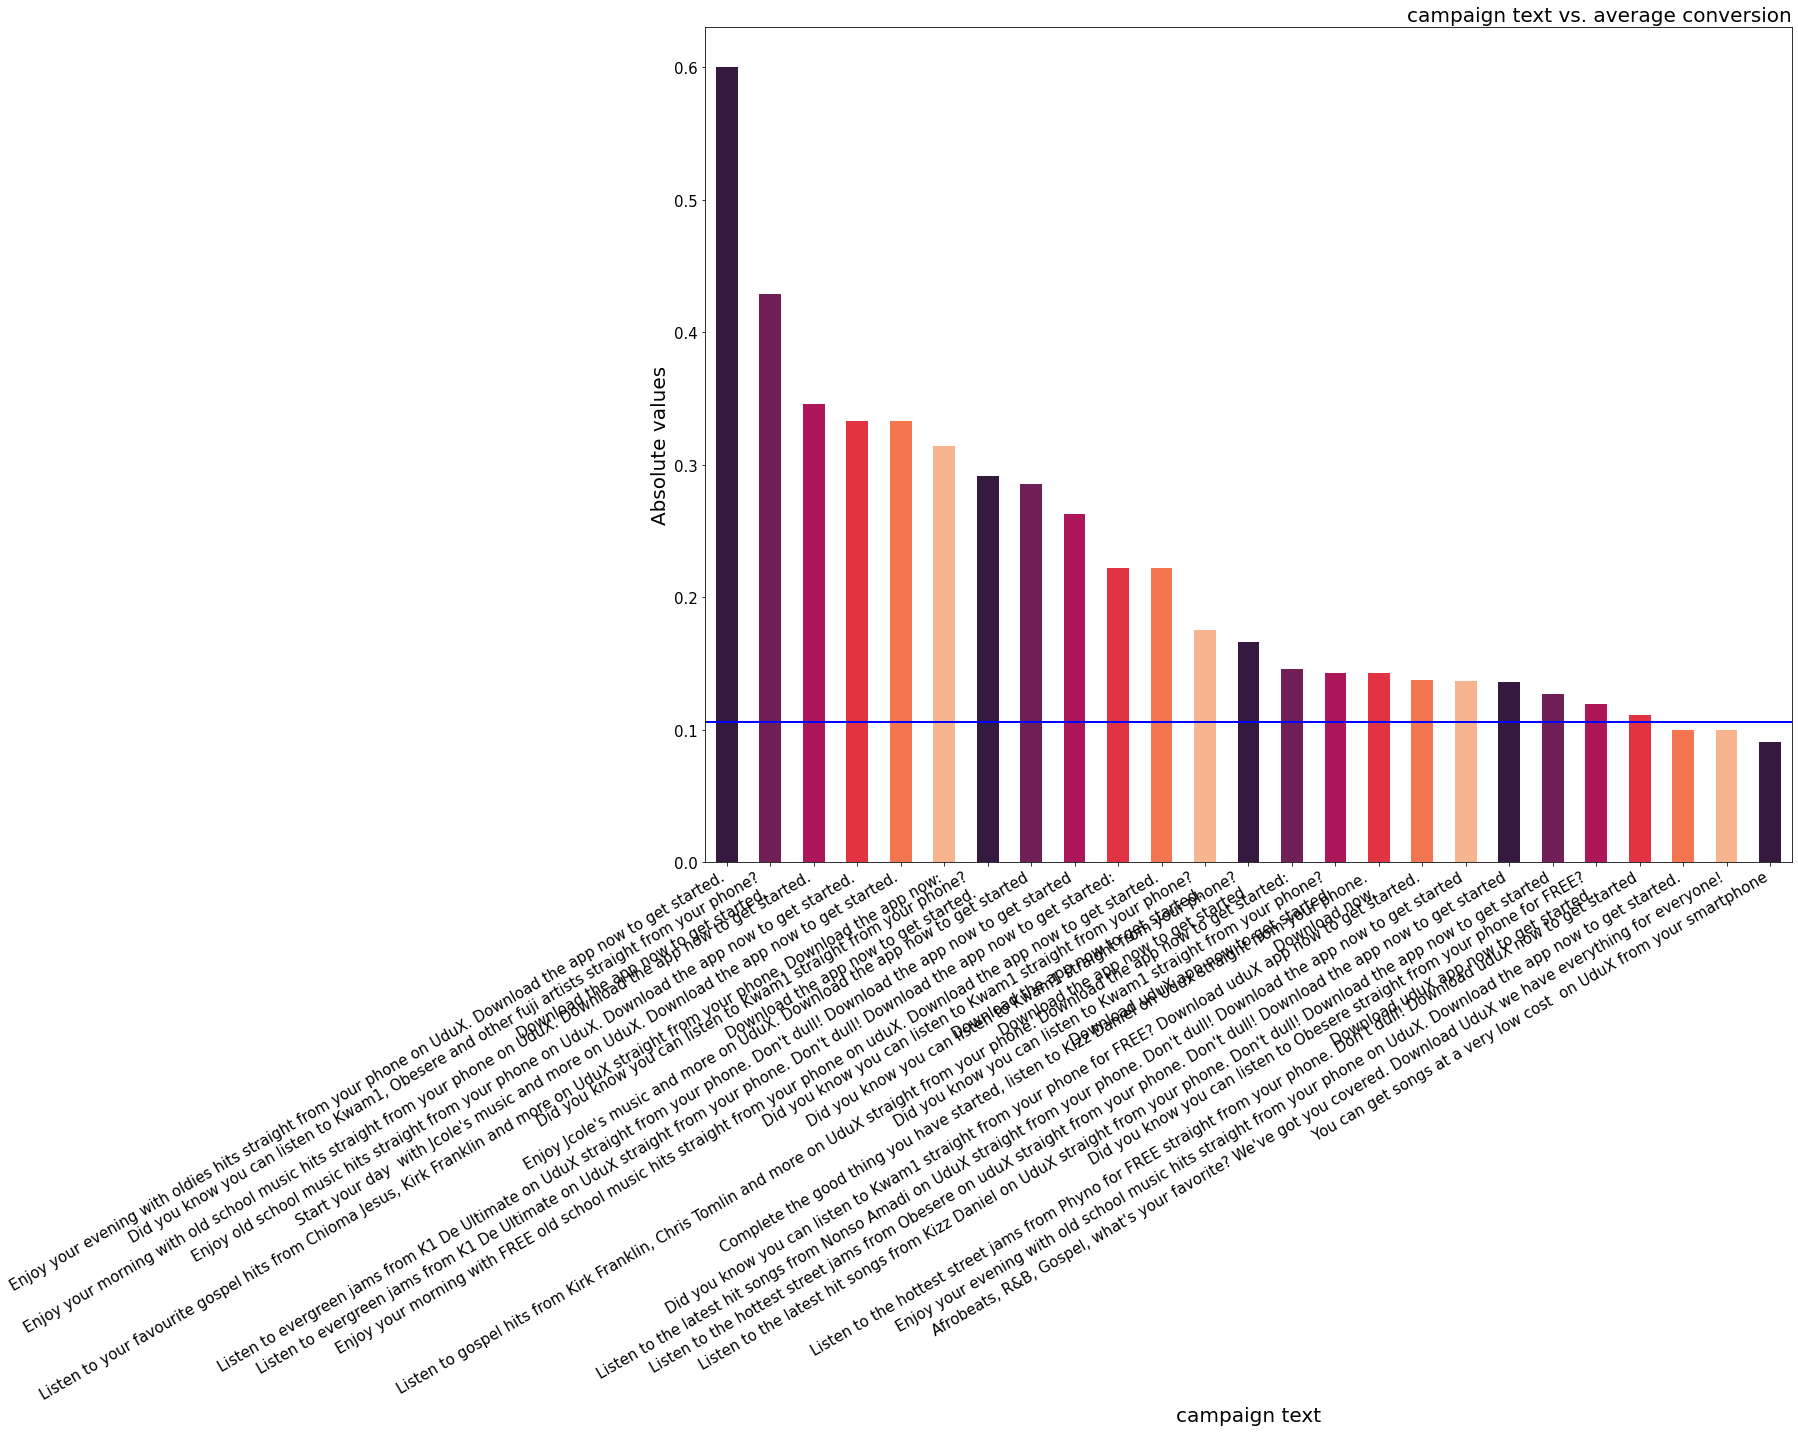

In [42]:
# side table
st = df.groupby("ad_text")["conversion"].mean().sort_values(ascending=False).to_frame()
st["percent"] = (st.apply(lambda x: x/x.sum())*100).round(2)
st['cumsum'] = st["percent"].cumsum()
display(st.head(25))

print(f'ad_text Average installs: {(df.groupby("ad_text")["conversion"].mean().mean())}')

ax = df.groupby("ad_text")["conversion"].mean().sort_values(ascending=False).head(25).plot(kind="bar", figsize=(25,20), fontsize=15, 
                                                                                                  color=sns.color_palette("rocket"), table=False)
plt.xticks(rotation=30, horizontalalignment="right")
plt.ylabel("Absolute values", fontsize=20)
plt.xlabel("campaign text", fontsize=20)
plt.title("campaign text vs. average conversion", fontsize=20, loc="right")
plt.axhline(df.groupby("ad_text")["conversion"].mean().mean(), linewidth=2, color ="b")
plt.tight_layout()

**22 Campaigns above average**

## Encoding

In [43]:
df["Male"] = df.gender.map(lambda gender: 1 if gender == "M" else 0)

In [44]:
df["Has a Bank Acc"] = df.has_bank.map(lambda has_bank: 1 if has_bank == "Yes" else 0)

In [45]:
location_region_encoded_df = pd.get_dummies(df['location_region'])
location_region_encoded_df.columns = ['location_region_%s' % x for x in location_region_encoded_df.columns]
location_region_encoded_df

,location_region_Unknown,location_region_north central,location_region_north east,location_region_north west,location_region_south east,location_region_south south,location_region_south west
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
65586,0,1,0,0,0,0,0
65587,0,0,0,0,0,0,1
65588,0,1,0,0,0,0,0
65589,0,0,0,0,0,0,1


In [46]:
customer_value_encoded_df = pd.get_dummies(df['customer_value'])
customer_value_encoded_df.columns = ['customer_value_%s' % x for x in customer_value_encoded_df.columns]
customer_value_encoded_df

,customer_value_Unknown,customer_value_high,customer_value_low,customer_value_medium,customer_value_top,customer_value_very high
0,0,1,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
65586,0,0,1,0,0,0
65587,0,0,1,0,0,0
65588,0,0,1,0,0,0
65589,0,1,0,0,0,0


In [47]:
df = pd.concat([df, customer_value_encoded_df, location_region_encoded_df], axis=1)
df.head()

,msisdn,timeline,event_type,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,...,customer_value_medium,customer_value_top,customer_value_very high,location_region_Unknown,location_region_north central,location_region_north east,location_region_north west,location_region_south east,location_region_south south,location_region_south west
0,b0c89e6222030d07623bbdfcd802068a,1.560000e+12,install,All your favorite songs in just one place! Dow...,2098.40,0.0,0.0,0.00,0.0,19.0,...,0,0,0,0,0,0,0,0,1,0
1,8dbe350a0864243bcbcab192c11afb1c,1.560000e+12,install,All your favourite songs in just one place! Do...,5361.80,510.0,156.0,2933.86,2000.0,42.0,...,0,0,1,0,0,0,0,0,0,1
2,e9494ef7df151115dd00cb9e0cd75b28,1.560000e+12,install,Did you know you can listen to Kwam1 straight ...,6000.26,240.0,24.0,2545.11,1000.0,46.0,...,0,0,1,0,0,0,0,0,0,1
3,3b17282522ff95f763243d9a87f25e01,1.560000e+12,install,Listen to the latest hit songs from favourite ...,4202.00,0.0,24.0,1098.80,0.0,49.0,...,0,0,0,0,0,0,0,1,0,0
4,e14725c65cb0a904d83fa6d5990244d6,1.560000e+12,install,All your favorite songs in just one place! Dow...,434.44,0.0,0.0,0.00,0.0,46.0,...,1,0,0,0,0,0,0,1,0,0


In [48]:
df["Smartphone Device"] = df.device_type.map(lambda device_type: 1 if device_type == "Smartphone" else 0)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65591 entries, 0 to 65590
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   msisdn                         65591 non-null  object 
 1   timeline                       65591 non-null  float64
 2   event_type                     65591 non-null  object 
 3   ad_text                        65591 non-null  object 
 4   spend_total                    65591 non-null  float64
 5   spend_vas                      65591 non-null  float64
 6   sms_cost                       65591 non-null  float64
 7   spend_voice                    65591 non-null  float64
 8   spend_data                     65591 non-null  float64
 9   customer_class                 65591 non-null  float64
 10  customer_value                 65591 non-null  object 
 11  age                            65591 non-null  float64
 12  gender                         65591 non-null 

In [50]:
data = df.copy()

In [51]:
data = data[[
    'customer_class',
    'age',
    'ad_text',
    'location_state',
    'location_lga',
    'Time',
    'Day',
    'Month',
    'Year',
    'Male',
    'Has a Bank Acc',
    'Smartphone Device',
    'conversion'
]]

In [52]:
data= pd.concat([data, customer_value_encoded_df, location_region_encoded_df], axis=1)

In [53]:
data

,customer_class,age,ad_text,location_state,location_lga,Time,Day,Month,Year,Male,...,customer_value_medium,customer_value_top,customer_value_very high,location_region_Unknown,location_region_north central,location_region_north east,location_region_north west,location_region_south east,location_region_south south,location_region_south west
0,19.0,30.0,All your favorite songs in just one place! Dow...,akwa ibom,oron,20:01:54,1,7,2019,1,...,0,0,0,0,0,0,0,0,1,0
1,42.0,33.0,All your favourite songs in just one place! Do...,lagos,ikeja,12:45:55,27,7,2019,1,...,0,0,1,0,0,0,0,0,0,1
2,46.0,43.0,Did you know you can listen to Kwam1 straight ...,lagos,kosofe,09:13:49,9,6,2019,1,...,0,0,1,0,0,0,0,0,0,1
3,49.0,46.0,Listen to the latest hit songs from favourite ...,abia,aba south,17:55:46,8,7,2019,1,...,0,0,0,0,0,0,0,1,0,0
4,46.0,42.0,All your favorite songs in just one place! Dow...,imo,owerri municipal,17:56:12,3,7,2019,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65586,300.0,34.0,All your favorite songs in just one place! Dow...,fct,municipal area council,18:15:59.202000,23,8,2020,1,...,0,0,0,0,1,0,0,0,0,0
65587,44.0,28.0,All your favorite songs in just one place! Dow...,lagos,ojo,13:01:24,17,7,2019,1,...,0,0,0,0,0,0,0,0,0,1
65588,44.0,44.0,Listen to the latest hit songs from favourite ...,plateau,jos north,19:52:31,10,7,2019,1,...,0,0,0,0,1,0,0,0,0,0
65589,49.0,26.0,What are you waiting for? Enjoy FREE music str...,ogun,shagamu,07:04:16,1,6,2019,1,...,0,0,0,0,0,0,0,0,0,1


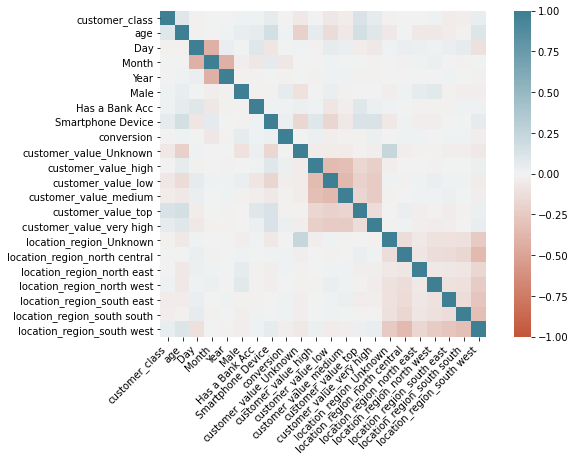

In [54]:
# Plotting feature correlation Matrix of all independent variables

corr = data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## VARIABLE SELECTION
#### using Python - Vote based approach

In [55]:
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = data.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    data[i] = d[i].transform(data[i].fillna('NA'))

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65591 entries, 0 to 65590
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_class                 65591 non-null  float64
 1   age                            65591 non-null  float64
 2   ad_text                        65591 non-null  int32  
 3   location_state                 65591 non-null  int32  
 4   location_lga                   65591 non-null  int32  
 5   Time                           65591 non-null  int32  
 6   Day                            65591 non-null  int64  
 7   Month                          65591 non-null  int64  
 8   Year                           65591 non-null  int64  
 9   Male                           65591 non-null  int64  
 10  Has a Bank Acc                 65591 non-null  int64  
 11  Smartphone Device              65591 non-null  int64  
 12  conversion                     65591 non-null 

In [57]:
features = data[data.columns.difference(['conversion'])]
labels = data['conversion']

In [58]:
features = features.fillna(0)

### Multicollinearity

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

calculate_vif(features)

,Features,VIF
0,Day,1.286858
1,Has a Bank Acc,1.038385
2,Male,1.028674
3,Month,1.607324
4,Smartphone Device,1.113321
5,Time,1.006323
6,Year,1.267719
7,ad_text,1.117996
8,age,1.133517
9,customer_class,1.030901


In [61]:
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [62]:
vif

,Features,VIF
0,Day,2.902602
1,Has a Bank Acc,1.082840
2,Male,2.913628
3,Smartphone Device,6.622611
4,Time,4.483424
5,ad_text,3.929360
6,age,8.868543
7,customer_class,1.588324
8,customer_value_Unknown,1.117355
9,customer_value_high,1.908126


In [63]:
list(vif['Features'])

['Day',
 'Has a Bank Acc',
 'Male',
 'Smartphone Device',
 'Time',
 'ad_text',
 'age',
 'customer_class',
 'customer_value_Unknown',
 'customer_value_high',
 'customer_value_medium',
 'customer_value_top',
 'customer_value_very high',
 'location_lga',
 'location_region_Unknown',
 'location_region_north central',
 'location_region_north east',
 'location_region_north west',
 'location_region_south east',
 'location_region_south south',
 'location_state']

### Information value

## WOE and IV

In [64]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import random
import os
import re

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, conversion):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(conversion, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(conversion, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_data = conv
            else:
                iv_data = iv_data.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_data.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_data,iv)

In [65]:
final_iv, IV = data_vars(data[data.columns.difference(['conversion'])],data.conversion)

In [66]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Day,1.0,10.0,35987,1202,0.033401,34785,0.966599,0.511925,0.550021,-0.071779,5.830553e-03
1,Day,11.0,31.0,29604,1146,0.038711,28458,0.961289,0.488075,0.449979,0.081269,5.830553e-03
2,Has a Bank Acc,0.0,0.0,62881,2210,0.035146,60671,0.964854,0.941227,0.959331,-0.019053,7.011806e-03
3,Has a Bank Acc,1.0,1.0,2710,138,0.050923,2572,0.949077,0.058773,0.040669,0.368235,7.011806e-03
4,Male,0.0,0.0,22064,507,0.022979,21557,0.977021,0.215928,0.340860,-0.456524,7.871783e-02
5,Male,1.0,1.0,43527,1841,0.042296,41686,0.957704,0.784072,0.659140,0.173564,7.871783e-02
6,Month,1.0,7.0,62375,2348,0.037643,60027,0.962357,1.000000,0.949149,0.052190,2.653938e-03
7,Month,8.0,12.0,3216,0,0.000000,3216,1.000000,0.000000,0.050851,0.000000,2.653938e-03
8,Smartphone Device,0.0,0.0,10045,256,0.025485,9789,0.974515,0.109029,0.154784,-0.350417,1.844548e-02
9,Smartphone Device,1.0,1.0,55546,2092,0.037662,53454,0.962338,0.890971,0.845216,0.052720,1.844548e-02


In [67]:
IV = IV.rename(columns={'VAR_NAME':'index'})
IV.sort_values(['IV'],ascending=0)

,index,IV
7,ad_text,1.718597e+00
2,Male,7.871783e-02
12,customer_value_low,2.948600e-02
11,customer_value_high,2.207801e-02
15,customer_value_very high,2.173464e-02
23,location_region_south west,1.980621e-02
4,Smartphone Device,1.844548e-02
5,Time,1.582237e-02
24,location_state,1.127370e-02
14,customer_value_top,8.622872e-03


In [68]:
# Appling WOE values to our dataframe columns
# The below code snippet can be used to apply the WOE values to our dataframe columns.

transform_vars_list = data.columns.difference(['conversion'])
transform_prefix = 'new_' # leave this value blank if you need replace the original column values

In [69]:
transform_vars_list

Index(['Day', 'Has a Bank Acc', 'Male', 'Month', 'Smartphone Device', 'Time',
       'Year', 'ad_text', 'age', 'customer_class', 'customer_value_Unknown',
       'customer_value_high', 'customer_value_low', 'customer_value_medium',
       'customer_value_top', 'customer_value_very high', 'location_lga',
       'location_region_Unknown', 'location_region_north central',
       'location_region_north east', 'location_region_north west',
       'location_region_south east', 'location_region_south south',
       'location_region_south west', 'location_state'],
      dtype='object')

In [70]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            data[transform_prefix + var] = data[var].apply(lambda x: eval(replace_cmd))
        except:
            data[transform_prefix + var] = data[var].apply(lambda x: eval(replace_cmd1))

### Variable Improtance

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features,labels)

preds = clf.predict(features)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(preds,labels)
print(accuracy)

0.9998475400588496


In [72]:
# Creating a dataframe with variable importance scores

from pandas import DataFrame
VI = DataFrame(clf.feature_importances_, columns = ["RF"], index=features.columns)

VI = VI.reset_index()
VI.sort_values(['RF'],ascending=0)

,index,RF
4,Time,0.304876
6,age,0.133977
0,Day,0.130681
13,location_lga,0.112736
5,ad_text,0.080229
7,customer_class,0.068636
20,location_state,0.060839
10,customer_value_medium,0.015222
9,customer_value_high,0.012148
15,location_region_north central,0.009950


### Recursive Feature Elimination

In [73]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(features, labels)

In [74]:
from pandas import DataFrame
Selected = DataFrame(rfe.support_, columns = ["RFE"], index=features.columns)
Selected = Selected.reset_index()

In [75]:
Selected[Selected['RFE'] == True]

,index,RFE
0,Day,True
1,Has a Bank Acc,True
2,Male,True
3,Smartphone Device,True
4,Time,True
5,ad_text,True
6,age,True
7,customer_class,True
8,customer_value_Unknown,True
9,customer_value_high,True


### Variable Importance using Extratrees Classifier

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(features, labels)

print(model.feature_importances_)

[1.24614702e-01 5.44457747e-03 6.68610735e-03 7.53657982e-03
 3.50405182e-01 8.65963736e-02 1.27977046e-01 9.16840677e-02
 8.87309487e-05 5.72436602e-03 9.84856012e-03 4.04247945e-03
 4.69487805e-03 9.41225896e-02 2.95989920e-03 6.30860463e-03
 3.52090133e-03 4.03755452e-03 4.47354482e-03 5.30308465e-03
 5.39301710e-02]


In [77]:
from pandas import DataFrame
FI = DataFrame(model.feature_importances_, columns = ["Extratrees"], index=features.columns)

In [78]:
FI = FI.reset_index()

In [79]:
FI.sort_values(['Extratrees'],ascending=0)

,index,Extratrees
4,Time,0.350405
6,age,0.127977
0,Day,0.124615
13,location_lga,0.094123
7,customer_class,0.091684
5,ad_text,0.086596
20,location_state,0.053930
10,customer_value_medium,0.009849
3,Smartphone Device,0.007537
2,Male,0.006686


### Chi Square

In [80]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

model = SelectKBest(score_func=chi2, k=5)
fit = model.fit(features.abs(), labels)

In [81]:
from pandas import DataFrame
pd.options.display.float_format = '{:.2f}'.format
chi_sq = DataFrame(fit.scores_, columns = ["Chi_Square"], index=features.columns)

In [82]:
chi_sq = chi_sq.reset_index()

In [83]:
chi_sq.sort_values('Chi_Square',ascending=0)

,index,Chi_Square
4,Time,268172.44
5,ad_text,23949.00
13,location_lga,1339.31
20,location_state,79.82
2,Male,53.25
12,customer_value_very high,48.34
9,customer_value_high,41.22
7,customer_class,35.89
6,age,22.18
1,Has a Bank Acc,17.96


### L1

In [84]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(features, labels)
model = SelectFromModel(lsvc,prefit=True)

In [85]:
from pandas import DataFrame
l1 = DataFrame(model.get_support(), columns = ["L1"], index=features.columns)
l1 = l1.reset_index()

In [86]:
l1[l1['L1'] == True]

,index,L1
0,Day,True
2,Male,True
3,Smartphone Device,True
5,ad_text,True
6,age,True
7,customer_class,True
9,customer_value_high,True
11,customer_value_top,True
12,customer_value_very high,True
20,location_state,True


In [87]:
## Combine all together

from functools import reduce
dfs = [IV, VI, Selected, FI, chi_sq, l1]
final_results = reduce(lambda left,right: pd.merge(left,right,on='index'), dfs)

### Feature voting

In [88]:
columns = ['IV', 'RF', 'Extratrees', 'Chi_Square']

score_table = pd.DataFrame({},[])
score_table['index'] = final_results['index']

for i in columns:
    score_table[i] = final_results['index'].isin(list(final_results.nlargest(5,i)['index'])).astype(int)
    
score_table['RFE'] = final_results['RFE'].astype(int)
score_table['L1'] = final_results['L1'].astype(int)

In [89]:
score_table['final_score'] = score_table.sum(axis=1)

In [90]:
score_table.sort_values('final_score',ascending=0)

,index,IV,RF,Extratrees,Chi_Square,RFE,L1,final_score
5,ad_text,1,1,0,1,1,1,5
0,Day,0,1,1,0,1,1,4
2,Male,1,0,0,1,1,1,4
13,location_lga,0,1,1,1,1,0,4
4,Time,0,1,1,1,1,0,4
6,age,0,1,1,0,1,1,4
9,customer_value_high,1,0,0,0,1,1,3
12,customer_value_very high,1,0,0,0,1,1,3
20,location_state,0,0,0,1,1,1,3
7,customer_class,0,0,1,0,1,1,3


## Multicollinearity Re-check
### Selecting our Features/Variables

In [91]:
# Filtering the variables with score equal or lower than 2

features = features[list(score_table[score_table['final_score'] >= 2]['index'])]

In [92]:
# Narrowing down the features until their VIF is lower than 10

vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

In [93]:
list(vif['Features'])

['Day',
 'Male',
 'Smartphone Device',
 'Time',
 'ad_text',
 'age',
 'customer_class',
 'customer_value_high',
 'customer_value_top',
 'customer_value_very high',
 'location_lga',
 'location_state']

In [94]:
# score check
vif

,Features,VIF
0,Day,2.67
1,Male,2.79
2,Smartphone Device,6.21
3,Time,4.22
4,ad_text,3.75
5,age,8.25
6,customer_class,1.58
7,customer_value_high,1.49
8,customer_value_top,1.25
9,customer_value_very high,1.33


In [95]:
# final features 

my_features = vif['Features']

### Descriptive Stats For Selected Features

In [96]:
final_vars = list(vif['Features']) + ['conversion']

In [97]:
mydata = data[final_vars].fillna(0)

In [98]:
mydata.describe()

,Day,Male,Smartphone Device,Time,ad_text,age,customer_class,customer_value_high,customer_value_top,customer_value_very high,location_lga,location_state,conversion
count,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00,65591.00
mean,11.97,0.66,0.85,20353.26,34.83,35.61,63.04,0.24,0.09,0.14,332.89,19.06,0.04
std,8.57,0.47,0.36,10344.98,19.75,12.62,85.22,0.42,0.28,0.34,223.60,10.23,0.19
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.00,0.00,1.00,12301.00,6.00,26.00,44.00,0.00,0.00,0.00,135.00,12.00,0.00
50%,10.00,1.00,1.00,20774.00,45.00,34.00,46.00,0.00,0.00,0.00,318.00,24.00,0.00
75%,19.00,1.00,1.00,28569.00,47.00,43.00,46.00,0.00,0.00,0.00,517.00,25.00,0.00
max,31.00,1.00,1.00,39530.00,61.00,135.00,1051.00,1.00,1.00,1.00,737.00,37.00,1.00


,Day,Male,Smartphone Device,Time,ad_text,age,customer_class,customer_value_high,customer_value_top,customer_value_very high,location_lga,location_state,conversion
Day,1.00,0.00,-0.09,-0.06,-0.17,-0.01,-0.02,-0.02,-0.05,-0.05,0.05,-0.07,0.00
Male,0.00,1.00,-0.01,-0.01,-0.04,0.04,0.02,-0.00,-0.00,-0.01,0.01,0.01,0.05
Smartphone Device,-0.09,-0.01,1.00,0.00,0.04,0.16,0.06,0.09,0.12,0.12,0.00,0.05,0.02
Time,-0.06,-0.01,0.00,1.00,0.03,0.01,0.01,-0.02,0.01,-0.01,-0.01,0.01,-0.03
ad_text,-0.17,-0.04,0.04,0.03,1.00,0.04,0.01,-0.03,0.01,-0.01,-0.05,0.04,-0.18
age,-0.01,0.04,0.16,0.01,0.04,1.00,0.10,0.05,0.16,0.10,0.00,0.08,0.01
customer_class,-0.02,0.02,0.06,0.01,0.01,0.10,1.00,-0.00,0.12,0.06,-0.01,0.04,-0.00
customer_value_high,-0.02,-0.00,0.09,-0.02,-0.03,0.05,-0.00,1.00,-0.17,-0.22,-0.00,0.02,0.03
customer_value_top,-0.05,-0.00,0.12,0.01,0.01,0.16,0.12,-0.17,1.00,-0.12,0.01,0.02,-0.02
customer_value_very high,-0.05,-0.01,0.12,-0.01,-0.01,0.10,0.06,-0.22,-0.12,1.00,-0.01,0.02,0.03


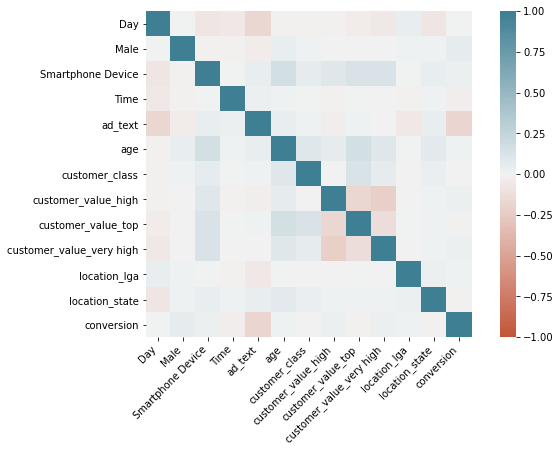

In [99]:
# Final correlation check plotting heatmap

corr = mydata.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

corr

In [100]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65591 entries, 0 to 65590
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       65591 non-null  int64  
 1   Male                      65591 non-null  int64  
 2   Smartphone Device         65591 non-null  int64  
 3   Time                      65591 non-null  int32  
 4   ad_text                   65591 non-null  int32  
 5   age                       65591 non-null  float64
 6   customer_class            65591 non-null  float64
 7   customer_value_high       65591 non-null  uint8  
 8   customer_value_top        65591 non-null  uint8  
 9   customer_value_very high  65591 non-null  uint8  
 10  location_lga              65591 non-null  int32  
 11  location_state            65591 non-null  int32  
 12  conversion                65591 non-null  int64  
dtypes: float64(2), int32(4), int64(4), uint8(3)
memory usage: 4.2

## Model Selection

**Train/Test Split**

In [101]:
from sklearn.model_selection import train_test_split

features = mydata.loc[:, mydata.columns != 'conversion']
label = mydata['conversion']

train, test = train_test_split(mydata, test_size = 0.4)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

features_train = train[list(vif['Features'])]
label_train = train['conversion']
features_test = test[list(vif['Features'])]
label_test = test['conversion']

### Trying 6 different Models

## Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
f1_score_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
f1_score_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,f1_score_train,f1_score_test)

0.9998983584896072 0.9573121927049586 0.9999999906287874 0.7822165537947339


In [103]:
metrics = ['accuracy_train','accuracy_test','f1_score_train','f1_score_test']

pd.options.display.float_format = '{:.3f}'.format

scores = np.array([accuracy_train, accuracy_test, f1_score_train, f1_score_test])
RF = pd.DataFrame(scores, columns = ['Random_Forest'], index = metrics).reset_index()

RF

,index,Random_Forest
0,accuracy_train,1.000
1,accuracy_test,0.957
2,f1_score_train,1.000
3,f1_score_test,0.782


In [104]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,37948,0
1,4,1402


## Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
f1_score_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
f1_score_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,f1_score_train,f1_score_test)

0.9642730090969152 0.9640965049357777 0.7453531249095678 0.7244842073721173


In [106]:
metrics = ['accuracy_train','accuracy_test','f1_score_train','f1_score_test']

pd.options.display.float_format = '{:.3f}'.format

scores = np.array([accuracy_train, accuracy_test, f1_score_train, f1_score_test])
LR = pd.DataFrame(scores, columns = ['Logistic_regression'], index = metrics).reset_index()
LR

,index,Logistic_regression
0,accuracy_train,0.964
1,accuracy_test,0.964
2,f1_score_train,0.745
3,f1_score_test,0.724


In [107]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0
ACTUAL,
0,37948
1,1406


## K Nearest Neighbors

In [108]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
f1_score_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
f1_score_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,f1_score_train,f1_score_test)

0.9649336789144687 0.9636391355719023 0.9490628018936147 0.5328108783446626


In [109]:
metrics = ['accuracy_train','accuracy_test','f1_score_train','f1_score_test']

pd.options.display.float_format = '{:.3f}'.format

scores = np.array([accuracy_train, accuracy_test, f1_score_train, f1_score_test])
KN = pd.DataFrame(scores, columns = ['KNeighbors_Classifier'], index = metrics).reset_index()
KN

,index,KNeighbors_Classifier
0,accuracy_train,0.965
1,accuracy_test,0.964
2,f1_score_train,0.949
3,f1_score_test,0.533


## Decision Tree

In [110]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
f1_score_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
f1_score_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,f1_score_train,f1_score_test)

0.9999745896224018 0.9322331059191219 0.9999999906287874 0.5647105555716432


In [111]:
metrics = ['accuracy_train','accuracy_test','f1_score_train','f1_score_test']

pd.options.display.float_format = '{:.3f}'.format

scores = np.array([accuracy_train, accuracy_test, f1_score_train, f1_score_test])
DT = pd.DataFrame(scores, columns = ['Decision_Tree'], index = metrics).reset_index()
DT

,index,Decision_Tree
0,accuracy_train,1.000
1,accuracy_test,0.932
2,f1_score_train,1.000
3,f1_score_test,0.565


## Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB 
clf = GaussianNB()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
f1_score_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
f1_score_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,f1_score_train,f1_score_test)

0.9642730090969152 0.9640965049357777 0.7735111635882359 0.7527099965628513


In [113]:
metrics = ['accuracy_train','accuracy_test','f1_score_train','f1_score_test']

pd.options.display.float_format = '{:.3f}'.format

scores = np.array([accuracy_train, accuracy_test, f1_score_train, f1_score_test])
NB = pd.DataFrame(scores, columns = ['Naive_Bayes'], index = metrics).reset_index()
NB

,index,Naive_Bayes
0,accuracy_train,0.964
1,accuracy_test,0.964
2,f1_score_train,0.774
3,f1_score_test,0.753


## Gradient Boosting

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(features_train,label_train)

pred_train = clf.predict(features_train)
pred_test = clf.predict(features_test)

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,label_train)
accuracy_test = accuracy_score(pred_test,label_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(label_train), clf.predict_proba(features_train)[:,1])
f1_score_train = metrics.auc(fpr,tpr)

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), clf.predict_proba(features_test)[:,1])
f1_score_test = metrics.auc(fpr,tpr)

print(accuracy_train,accuracy_test,f1_score_train,f1_score_test)

0.9654927072216293 0.9644776460723405 0.8904257188207386 0.8563772327302166


In [115]:
metrics = ['accuracy_train','accuracy_test','f1_score_train','f1_score_test']

pd.options.display.float_format = '{:.3f}'.format

scores = np.array([accuracy_train, accuracy_test, f1_score_train, f1_score_test])
GB = pd.DataFrame(scores, columns = ['Gradient_boosting'], index = metrics).reset_index()
GB

,index,Gradient_boosting
0,accuracy_train,0.965
1,accuracy_test,0.964
2,f1_score_train,0.890
3,f1_score_test,0.856


## Best model

In [116]:
# Create a dataframe with scores
# Combine altogether
dfs = [RF, LR, KN, DT, NB, GB]
summary = reduce(lambda left,right: pd.merge(left, right, on = 'index'), dfs)
summary

,index,Random_Forest,Logistic_regression,KNeighbors_Classifier,Decision_Tree,Naive_Bayes,Gradient_boosting
0,accuracy_train,1.000,0.964,0.965,1.000,0.964,0.965
1,accuracy_test,0.957,0.964,0.964,0.932,0.964,0.964
2,f1_score_train,1.000,0.745,0.949,1.000,0.774,0.890
3,f1_score_test,0.782,0.724,0.533,0.565,0.753,0.856


In [117]:
# Filter F1 scores
f1_scores = summary.iloc[3:,:]
f1_scores = f1_scores.transpose()
f1_scores.columns = f1_scores.iloc[0]
f1_scores.drop(f1_scores.index[0], inplace = True)
f1_scores

index,f1_score_test
Random_Forest,0.782
Logistic_regression,0.724
KNeighbors_Classifier,0.533
Decision_Tree,0.565
Naive_Bayes,0.753
Gradient_boosting,0.856


**Gradient_boost is our best model**

In [118]:
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

print(classification_report(label_train, pred_train, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     37948
           1       0.90      0.04      0.07      1406

    accuracy                           0.97     39354
   macro avg       0.93      0.52      0.53     39354
weighted avg       0.96      0.97      0.95     39354



In [119]:
pd.crosstab(label_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED,0,1
ACTUAL,,
0,37942,6
1,1352,54


In [120]:
print(classification_report(label_test, pred_test, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     25295
           1       0.73      0.02      0.03       942

    accuracy                           0.96     26237
   macro avg       0.85      0.51      0.51     26237
weighted avg       0.96      0.96      0.95     26237



## Feature Importance Plot

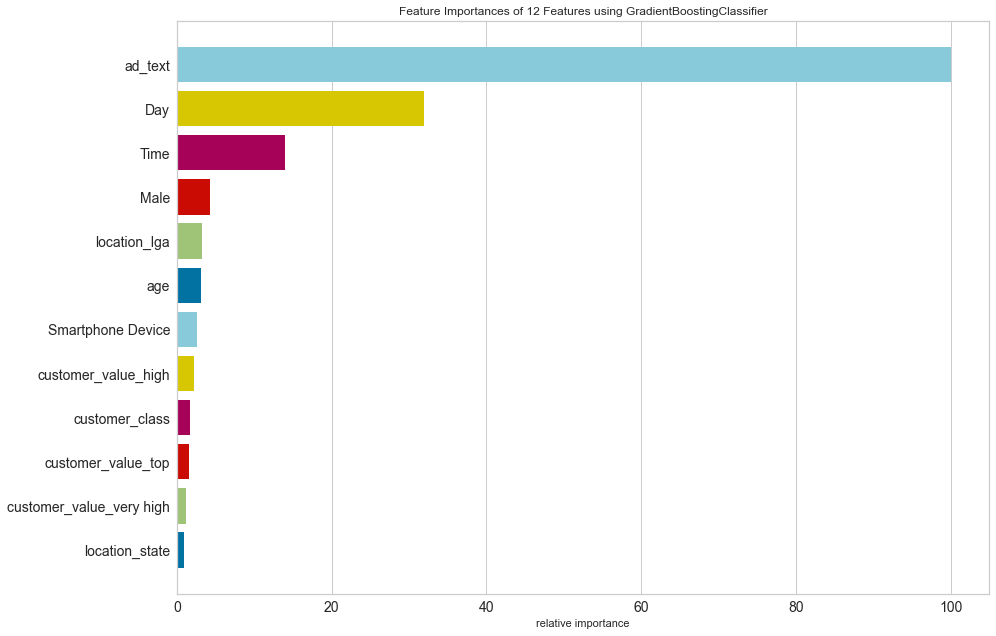

FeatureImportances(ax=<AxesSubplot:title={'center':'Feature Importances of 12 Features using GradientBoostingClassifier'}, xlabel='relative importance'>,
                   estimator=GradientBoostingClassifier())

In [121]:
from yellowbrick.model_selection import feature_importances
plt.figure(figsize=(14,9))
plt.tick_params(labelsize=14)
feature_importances(GradientBoostingClassifier(),features_train,label_train)

## Model Performance

In [122]:
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [123]:
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pylab import rcParams
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
from pandas.plotting import register_matplotlib_converters

### Confusion Matrix

In [124]:
confusion_Md = pd.crosstab(label_test,pd.Series(pred_test),rownames=['ACTUAL'],colnames=['PRED'])
confusion_Md

PRED,0,1
ACTUAL,,
0,25289,6
1,926,16


### ROC/AUC curve or c-statistic

In [125]:
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = clf.predict_proba(features_train)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_train), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend_label = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [126]:
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()

from sklearn import metrics
preds = clf.predict_proba(features_test)[:,1]

fpr, tpr, _ = metrics.roc_curve(np.array(label_test), preds)
auc = metrics.auc(fpr,tpr)

p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend_label = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

## Decile Plots and Kolmogorov Smirnov(KS) Statistic¶

In [127]:
from collections import OrderedDict
import pandas as pd
import sys
%matplotlib inline
    
def plot_pandas_style(styler):
    from IPython.core.display import HTML
    html = '\n'.join([line.lstrip() for line in styler.render().split('\n')])
    return HTML(html)

def highlight_max(s,color='yellow'):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: {}'.format(color) if v else '' for v in is_max]

def decile_labels(agg1,label,color='skyblue'):
    agg_dummy = pd.DataFrame(OrderedDict((('TOTAL',0),('CONVERSION',0),('NON-CONVERSION',0),('PCT_CON',0),('CUM_CON',0),('CUM_NONCON',0),('DIST_CON',0),('DIST_NONCON',0),('SPREAD',0))),index=[0])
    agg1 = agg1.append(agg_dummy).sort_index()
    agg1.index.name = label
    agg1 = agg1.style.apply(highlight_max, color = 'yellow', subset=['SPREAD'])
    agg1.bar(subset=['CONVERSION'], color='{}'.format(color))
    agg1.bar(subset=['TOTAL'], color='{}'.format(color))
    agg1.bar(subset=['PCT_CON'], color='{}'.format(color))
    return(agg1)

def deciling(data,decile_by,conversion,nonconversion):
    inputs = list(decile_by)
    inputs.extend((conversion,nonconversion))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['TOTAL'] = grouped.sum()[nonconversion] + grouped.sum()[conversion]
    agg1['CONVERSION'] = grouped.sum()[conversion]
    agg1['NON-CONVERSION'] = grouped.sum()[nonconversion]
    agg1['PCT_CON'] = grouped.mean()[conversion]*100
    agg1['CUM_CON'] = grouped.sum()[conversion].cumsum()
    agg1['CUM_NONCON'] = grouped.sum()[nonconversion].cumsum()
    agg1['DIST_CON'] = agg1['CUM_CON']/agg1['CONVERSION'].sum()*100
    agg1['DIST_NONCON'] = agg1['CUM_NONCON']/agg1['NON-CONVERSION'].sum()*100
    agg1['SPREAD'] = (agg1['DIST_CON'] - agg1['DIST_NONCON'])
    agg1 = decile_labels(agg1,'DECILE',color='skyblue')
    return(plot_pandas_style(agg1))

In [128]:
def scoring(features,clf,conversion):
    score = pd.DataFrame(clf.predict_proba(features)[:,1], columns = ['SCORE'])
    score['DECILE'] = pd.qcut(score['SCORE'].rank(method = 'first'),10,labels=range(10,0,-1))
    score['DECILE'] = score['DECILE'].astype(float)
    score['CONVERSION'] = conversion
    score['NON-CONVERSION'] = 1 - conversion
    return(score)

In [129]:
scores_train = scoring(features_train,clf,label_train)
scores_test = scoring(features_test,clf,label_test)

In [130]:
deciling(scores_train,['DECILE'],'CONVERSION','NON-CONVERSION')

,TOTAL,CONVERSION,NON-CONVERSION,PCT_CON,CUM_CON,CUM_NONCON,DIST_CON,DIST_NONCON,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,3936,750,3186,19.054878,750,3186,53.342817,8.395699,44.947117
2.0,3935,328,3607,8.335451,1078,6793,76.671408,17.900812,58.770597
3.0,3935,192,3743,4.879288,1270,10536,90.327169,27.764309,62.562860
4.0,3936,85,3851,2.159553,1355,14387,96.372688,37.912406,58.460282
5.0,3935,46,3889,1.168996,1401,18276,99.644381,48.160641,51.483740
6.0,3935,5,3930,0.127065,1406,22206,100.000000,58.516918,41.483082
7.0,3936,0,3936,0.000000,1406,26142,100.000000,68.889006,31.110994
8.0,3935,0,3935,0.000000,1406,30077,100.000000,79.258459,20.741541


In [131]:
deciling(scores_test,['DECILE'],'CONVERSION','NON-CONVERSION')

,TOTAL,CONVERSION,NON-CONVERSION,PCT_CON,CUM_CON,CUM_NONCON,DIST_CON,DIST_NONCON,SPREAD
DECILE,,,,,,,,,
0.0,0,0,0,0.000000,0,0,0.000000,0.000000,0.000000
1.0,2624,426,2198,16.234756,426,2198,45.222930,8.689464,36.533466
2.0,2624,212,2412,8.079268,638,4610,67.728238,18.224946,49.503292
3.0,2623,155,2468,5.909264,793,7078,84.182590,27.981815,56.200776
4.0,2624,79,2545,3.010671,872,9623,92.569002,38.043092,54.525911
5.0,2623,51,2572,1.944339,923,12195,97.983015,48.211109,49.771906
6.0,2624,13,2611,0.495427,936,14806,99.363057,58.533307,40.829750
7.0,2624,3,2621,0.114329,939,17427,99.681529,68.895039,30.786490
8.0,2623,3,2620,0.114373,942,20047,100.000000,79.252817,20.747183


### Lift chart,Actual vs predicted and Gains chart

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

def plots(agg1,conversion,type):

    plt.figure(1,figsize=(20, 5))

    plt.subplot(131)
    plt.plot(agg1['DECILE'],agg1['ACTUAL'],label='Actual')
    plt.plot(agg1['DECILE'],agg1['PRED'],label='Pred')
    plt.xticks(range(10,110,10))
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.title('Actual vs Predicted', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(conversion) + " " + str(type) + " %",fontsize=15)

    plt.subplot(132)
    X = agg1['DECILE'].tolist()
    X.append(0)
    Y = agg1['DIST_CON'].tolist()
    Y.append(0)
    plt.plot(sorted(X),sorted(Y))
    plt.plot([0, 100], [0, 100],'r--')
    plt.xticks(range(0,110,10))
    plt.yticks(range(0,110,10))
    plt.grid(True)
    plt.title('Gains Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel(str(conversion) + str(" DISTRIBUTION") + " %",fontsize=15)
    plt.annotate(round(agg1[agg1['DECILE'] == 30].DIST_CON.item(),2),xy=[30,30], 
            xytext=(25, agg1[agg1['DECILE'] == 30].DIST_CON.item() + 5),fontsize = 13)
    plt.annotate(round(agg1[agg1['DECILE'] == 50].DIST_CON.item(),2),xy=[50,50], 
            xytext=(45, agg1[agg1['DECILE'] == 50].DIST_CON.item() + 5),fontsize = 13)

    plt.subplot(133)
    plt.plot(agg1['DECILE'],agg1['LIFT'])
    plt.xticks(range(10,110,10))
    plt.grid(True)
    plt.title('Lift Chart', fontsize=20)
    plt.xlabel("Population %",fontsize=15)
    plt.ylabel("Lift",fontsize=15)

    plt.tight_layout()

In [133]:
def gains(data,decile_by,conversion,score):
    inputs = list(decile_by)
    inputs.extend((conversion,score))
    decile = data[inputs]
    grouped = decile.groupby(decile_by)
    agg1 = pd.DataFrame({},index=[])
    agg1['ACTUAL'] = grouped.mean()[conversion]*100
    agg1['PRED'] = grouped.mean()[score]*100
    agg1['DIST_CON'] = grouped.sum()[conversion].cumsum()/grouped.sum()[conversion].sum()*100
    agg1.index.name = 'DECILE'
    agg1 = agg1.reset_index()
    agg1['DECILE'] = agg1['DECILE']*10
    agg1['LIFT'] = agg1['DIST_CON']/agg1['DECILE']
    plots(agg1,conversion,'Distribution')

In [134]:
lift_train = pd.concat([features_train,scores_train],axis=1)
lift_test = pd.concat([features_test,scores_test],axis=1)

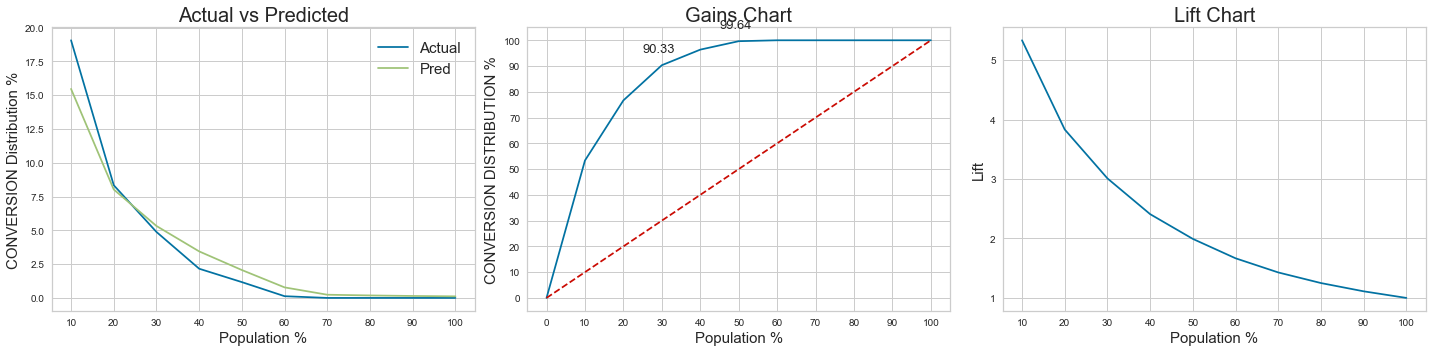

In [135]:
gains(lift_train,['DECILE'],'CONVERSION','SCORE')

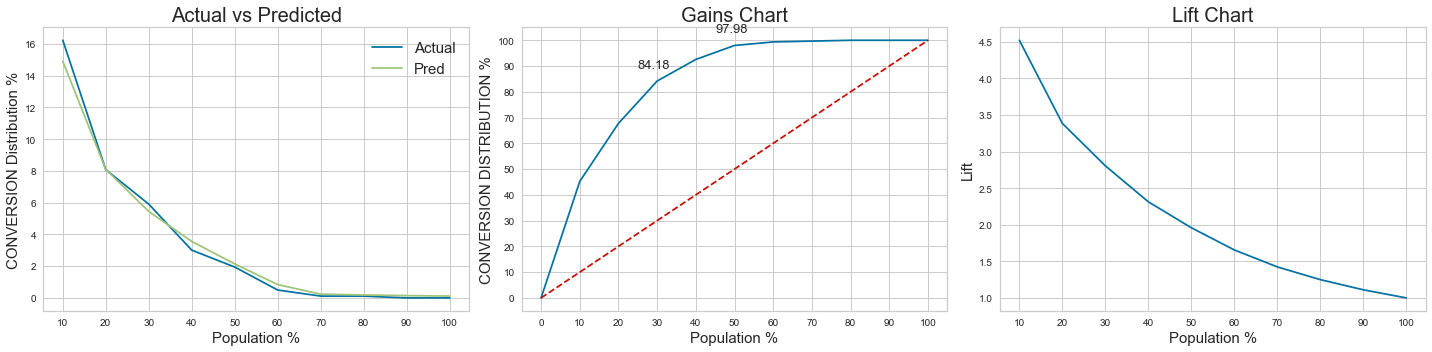

In [136]:
gains(lift_test,['DECILE'],'CONVERSION','SCORE')

In [137]:
# Define elements of confusion matrix for later use in A/B testing
tp = confusion_Md.loc[1,1]
tn = confusion_Md.loc[0,0]
fp = confusion_Md.loc[0,1]
fn = confusion_Md.loc[1,0]

In [138]:
# Save Model for future use (Deployment)

import joblib

filename = 'final_model_conversion'
final_model = GradientBoostingClassifier()
joblib.dump(final_model,filename)

['final_model_conversion']

## Score New data

#### Data Importation and transformation

In [139]:
Val = pd.read_csv('Downloads/TASK 1/validation.csv', sep=",")

In [140]:
Val.head()

,msisdn,timeline,timestamp,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,802c3dc863098b346e3d62c71107f032,1561740000000.000,2019-08-23T08:30:40.000Z,Listen to the latest hit songs from your favor...,1052.470,NaN,NaN,NaN,NaN,44.000,medium,53.000,M,No,south east,abia,ukwa east,tecno,spark 2 (ka7o),Smartphone,google,android
1,0f1d98624ee2d09f0ef2f8cb8e782507,1561990000000.000,2019-07-02T15:38:45.000Z,Listen to the latest hit songs from your favor...,22078.900,420.000,16.000,1300.320,1000.053,49.000,top,48.000,M,No,south west,lagos,eti osa,infinix,hot 6 pro (x608),Smartphone,google,android
2,450c1bf1096aa4c9f610791173169020,1561740000000.000,2019-07-03T17:32:42.000Z,Listen to the latest hit songs from your favor...,0.000,NaN,NaN,NaN,NaN,46.000,low,33.000,M,No,south west,ogun,ifo,tecno,spark,Smartphone,google,android
3,faf65cb4c3e7be71eff95bd62a3aa9bc,1560940000000.000,2019-06-24T15:05:41.000Z,Listen to the latest hit songs from Phyno on H...,2293.253,NaN,NaN,NaN,NaN,46.000,high,46.000,M,No,south west,lagos,mushin,lenovo,lenovo a plus,Smartphone,lenovo vibe a plus (a1010a20),google
4,6338fc13c44fad7de8cfb6e7259a2c75,1561470000000.000,2019-06-27T18:16:30.000Z,Stand a chance to win airtime when you downloa...,0.000,0.000,40.000,218.270,110.000,26.000,low,39.000,M,No,south south,rivers,obio/akpor,infinix,x624b,Smartphone,google,android


In [141]:
Val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   msisdn               5999 non-null   object 
 1   timeline             5936 non-null   float64
 2   timestamp            5999 non-null   object 
 3   ad_text              5999 non-null   object 
 4   spend_total          5962 non-null   float64
 5   spend_vas            4441 non-null   float64
 6   sms_cost             4441 non-null   float64
 7   spend_voice          4441 non-null   float64
 8   spend_data           4441 non-null   float64
 9   customer_class       5962 non-null   float64
 10  customer_value       5962 non-null   object 
 11  age                  5962 non-null   float64
 12  gender               5883 non-null   object 
 13  has_bank             5991 non-null   object 
 14  location_region      5475 non-null   object 
 15  location_state       5475 non-null   o

In [142]:
# Checking for duplicates
print('Number of duplicates:', Val.duplicated().sum())

Number of duplicates: 0


In [143]:
# Checking for null values
Val.isnull().sum()

msisdn                    0
timeline                 63
timestamp                 0
ad_text                   0
spend_total              37
spend_vas              1558
sms_cost               1558
spend_voice            1558
spend_data             1558
customer_class           37
customer_value           37
age                      37
gender                  116
has_bank                  8
location_region         524
location_state          524
location_lga            356
device_manufacturer      93
device_model             99
device_type             131
os_vendor               121
os_name                 120
dtype: int64

In [144]:
Val.loc[:, "age"].replace(2020,20, inplace = True)

In [145]:
# convert timestamp to date format

Val['timestamp'] = pd.to_datetime(Val['timestamp'])

Val.head()

,msisdn,timeline,timestamp,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name
0,802c3dc863098b346e3d62c71107f032,1561740000000.000,2019-08-23 08:30:40+00:00,Listen to the latest hit songs from your favor...,1052.470,NaN,NaN,NaN,NaN,44.000,medium,53.000,M,No,south east,abia,ukwa east,tecno,spark 2 (ka7o),Smartphone,google,android
1,0f1d98624ee2d09f0ef2f8cb8e782507,1561990000000.000,2019-07-02 15:38:45+00:00,Listen to the latest hit songs from your favor...,22078.900,420.000,16.000,1300.320,1000.053,49.000,top,48.000,M,No,south west,lagos,eti osa,infinix,hot 6 pro (x608),Smartphone,google,android
2,450c1bf1096aa4c9f610791173169020,1561740000000.000,2019-07-03 17:32:42+00:00,Listen to the latest hit songs from your favor...,0.000,NaN,NaN,NaN,NaN,46.000,low,33.000,M,No,south west,ogun,ifo,tecno,spark,Smartphone,google,android
3,faf65cb4c3e7be71eff95bd62a3aa9bc,1560940000000.000,2019-06-24 15:05:41+00:00,Listen to the latest hit songs from Phyno on H...,2293.253,NaN,NaN,NaN,NaN,46.000,high,46.000,M,No,south west,lagos,mushin,lenovo,lenovo a plus,Smartphone,lenovo vibe a plus (a1010a20),google
4,6338fc13c44fad7de8cfb6e7259a2c75,1561470000000.000,2019-06-27 18:16:30+00:00,Stand a chance to win airtime when you downloa...,0.000,0.000,40.000,218.270,110.000,26.000,low,39.000,M,No,south south,rivers,obio/akpor,infinix,x624b,Smartphone,google,android


In [146]:
# so we will replace missing values with 'None' and '0'

Val.loc[:,"timeline"].replace(np.nan,0,inplace=True)
Val.loc[:,"spend_total"].replace(np.nan,0,inplace=True)
Val.loc[:,"spend_vas"].replace(np.nan,0,inplace=True)
Val.loc[:,"sms_cost"].replace(np.nan,0,inplace=True)
Val.loc[:,"spend_voice"].replace(np.nan,0,inplace=True)
Val.loc[:,"spend_data"].replace(np.nan,0,inplace=True)
Val.loc[:,"customer_class"].replace(np.nan,0,inplace=True)
Val.loc[:,"customer_value"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"age"].replace(np.nan,0,inplace=True)
Val.loc[:,"gender"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"has_bank"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"location_region"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"location_state"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"location_lga"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"device_manufacturer"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"device_model"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"device_type"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"os_vendor"].replace(np.nan,"Unknown",inplace=True)
Val.loc[:,"os_name"].replace(np.nan,"Unknown",inplace=True)

In [147]:
Val.isnull().sum()

msisdn                 0
timeline               0
timestamp              0
ad_text                0
spend_total            0
spend_vas              0
sms_cost               0
spend_voice            0
spend_data             0
customer_class         0
customer_value         0
age                    0
gender                 0
has_bank               0
location_region        0
location_state         0
location_lga           0
device_manufacturer    0
device_model           0
device_type            0
os_vendor              0
os_name                0
dtype: int64

#### Splitting our Timestamp to Date and Tiime columns

In [148]:
Val['Date'] = [d.date() for d in Val['timestamp']]
Val['Time'] = [d.time() for d in Val['timestamp']]

In [149]:
Val['Day'] = pd.DatetimeIndex(Val['Date']).day
Val['Month'] = pd.DatetimeIndex(Val['Date']).month
Val['Year'] = pd.DatetimeIndex(Val['Date']).year

In [150]:
Val.drop(['timestamp', 'Date'], axis=1, inplace = True)
Val.head()

,msisdn,timeline,ad_text,spend_total,spend_vas,sms_cost,spend_voice,spend_data,customer_class,customer_value,age,gender,has_bank,location_region,location_state,location_lga,device_manufacturer,device_model,device_type,os_vendor,os_name,Time,Day,Month,Year
0,802c3dc863098b346e3d62c71107f032,1561740000000.000,Listen to the latest hit songs from your favor...,1052.470,0.000,0.000,0.000,0.000,44.000,medium,53.000,M,No,south east,abia,ukwa east,tecno,spark 2 (ka7o),Smartphone,google,android,08:30:40,23,8,2019
1,0f1d98624ee2d09f0ef2f8cb8e782507,1561990000000.000,Listen to the latest hit songs from your favor...,22078.900,420.000,16.000,1300.320,1000.053,49.000,top,48.000,M,No,south west,lagos,eti osa,infinix,hot 6 pro (x608),Smartphone,google,android,15:38:45,2,7,2019
2,450c1bf1096aa4c9f610791173169020,1561740000000.000,Listen to the latest hit songs from your favor...,0.000,0.000,0.000,0.000,0.000,46.000,low,33.000,M,No,south west,ogun,ifo,tecno,spark,Smartphone,google,android,17:32:42,3,7,2019
3,faf65cb4c3e7be71eff95bd62a3aa9bc,1560940000000.000,Listen to the latest hit songs from Phyno on H...,2293.253,0.000,0.000,0.000,0.000,46.000,high,46.000,M,No,south west,lagos,mushin,lenovo,lenovo a plus,Smartphone,lenovo vibe a plus (a1010a20),google,15:05:41,24,6,2019
4,6338fc13c44fad7de8cfb6e7259a2c75,1561470000000.000,Stand a chance to win airtime when you downloa...,0.000,0.000,40.000,218.270,110.000,26.000,low,39.000,M,No,south south,rivers,obio/akpor,infinix,x624b,Smartphone,google,android,18:16:30,27,6,2019


## Encoding the Score data

In [151]:
Val["Male"] = Val.gender.map(lambda gender: 1 if gender == "M" else 0)

In [152]:
Val["Has a Bank Acc"] = Val.has_bank.map(lambda has_bank: 1 if has_bank == "Yes" else 0)

In [153]:
location_region_encoded_Val = pd.get_dummies(Val['location_region'])
location_region_encoded_Val.columns = ['location_region_%s' % x for x in location_region_encoded_Val.columns]
location_region_encoded_Val

,location_region_Unknown,location_region_north central,location_region_north east,location_region_north west,location_region_south east,location_region_south south,location_region_south west
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
5994,0,1,0,0,0,0,0
5995,0,0,0,0,0,0,1
5996,0,0,0,0,0,0,1
5997,0,0,0,0,0,0,1


In [154]:
customer_value_encoded_Val = pd.get_dummies(Val['customer_value'])
customer_value_encoded_Val.columns = ['customer_value_%s' % x for x in customer_value_encoded_Val.columns]
customer_value_encoded_Val

,customer_value_Unknown,customer_value_high,customer_value_low,customer_value_medium,customer_value_top,customer_value_very high
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
5994,0,0,0,0,0,1
5995,0,0,0,1,0,0
5996,0,0,0,0,0,1
5997,0,0,0,1,0,0


In [155]:
Val = pd.concat([Val, customer_value_encoded_Val, location_region_encoded_Val], axis=1)

In [156]:
Val["Smartphone Device"] = Val.device_type.map(lambda device_type: 1 if device_type == "Smartphone" else 0)

In [157]:
Val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   msisdn                         5999 non-null   object 
 1   timeline                       5999 non-null   float64
 2   ad_text                        5999 non-null   object 
 3   spend_total                    5999 non-null   float64
 4   spend_vas                      5999 non-null   float64
 5   sms_cost                       5999 non-null   float64
 6   spend_voice                    5999 non-null   float64
 7   spend_data                     5999 non-null   float64
 8   customer_class                 5999 non-null   float64
 9   customer_value                 5999 non-null   object 
 10  age                            5999 non-null   float64
 11  gender                         5999 non-null   object 
 12  has_bank                       5999 non-null   o

In [158]:
Val_data = Val.copy()

In [159]:
Val_data = Val_data[[
    'msisdn',
    'customer_class',
    'age',
    'ad_text',
    'location_state',
    'location_lga',
    'Time',
    'Day',
    'Month',
    'Year',
    'Male',
    'Has a Bank Acc',
    'Smartphone Device'
]]

In [160]:
Val_data= pd.concat([Val_data, customer_value_encoded_Val, location_region_encoded_Val], axis=1)

In [161]:
Val_data

,msisdn,customer_class,age,ad_text,location_state,location_lga,Time,Day,Month,Year,Male,Has a Bank Acc,Smartphone Device,customer_value_Unknown,customer_value_high,customer_value_low,customer_value_medium,customer_value_top,customer_value_very high,location_region_Unknown,location_region_north central,location_region_north east,location_region_north west,location_region_south east,location_region_south south,location_region_south west
0,802c3dc863098b346e3d62c71107f032,44.000,53.000,Listen to the latest hit songs from your favor...,abia,ukwa east,08:30:40,23,8,2019,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0f1d98624ee2d09f0ef2f8cb8e782507,49.000,48.000,Listen to the latest hit songs from your favor...,lagos,eti osa,15:38:45,2,7,2019,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
2,450c1bf1096aa4c9f610791173169020,46.000,33.000,Listen to the latest hit songs from your favor...,ogun,ifo,17:32:42,3,7,2019,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,faf65cb4c3e7be71eff95bd62a3aa9bc,46.000,46.000,Listen to the latest hit songs from Phyno on H...,lagos,mushin,15:05:41,24,6,2019,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
4,6338fc13c44fad7de8cfb6e7259a2c75,26.000,39.000,Stand a chance to win airtime when you downloa...,rivers,obio/akpor,18:16:30,27,6,2019,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,42ef147bedd0be47726b4aa2cf352b74,46.000,49.000,Did you know you can listen to Kwam1 straight ...,kwara,ilorin west,20:10:10,12,6,2019,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
5995,a63a554ad9df14a996780f5c34184440,26.000,23.000,All your favorite songs in just one place! Dow...,ogun,ado-odo/ota,14:33:06,7,7,2019,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
5996,bd9afa77a72ef81f933effc229880367,49.000,58.000,All your favorite songs in just one place! Dow...,lagos,alimosho,16:50:28,4,7,2019,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
5997,a9ba811f7edeb5dceaa77f136722f341,46.000,25.000,All your favourite songs in just one place! Do...,lagos,kosofe,15:16:50,26,6,2019,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1


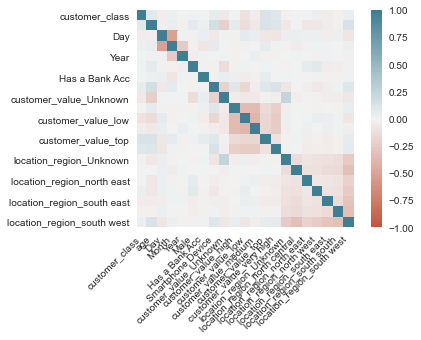

In [162]:
# Plotting feature correlation Matrix of all independent variables

corr = Val_data.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [163]:
# Find which encoded features are not present in score dataset
missing_var = set(my_features) - set(Val_data)
missing_var

set()

In [164]:
# Create the final score dataframe with all selected features and Customer_ID

score_d = Val_data[my_features]
score_d.insert(0, 'msisdn', Val_data['msisdn'])
score_d.head()

,msisdn,Day,Male,Smartphone Device,Time,ad_text,age,customer_class,customer_value_high,customer_value_top,customer_value_very high,location_lga,location_state
0,802c3dc863098b346e3d62c71107f032,23,1,1,08:30:40,Listen to the latest hit songs from your favor...,53.000,44.000,0,0,0,ukwa east,abia
1,0f1d98624ee2d09f0ef2f8cb8e782507,2,1,1,15:38:45,Listen to the latest hit songs from your favor...,48.000,49.000,0,1,0,eti osa,lagos
2,450c1bf1096aa4c9f610791173169020,3,1,1,17:32:42,Listen to the latest hit songs from your favor...,33.000,46.000,0,0,0,ifo,ogun
3,faf65cb4c3e7be71eff95bd62a3aa9bc,24,1,1,15:05:41,Listen to the latest hit songs from Phyno on H...,46.000,46.000,1,0,0,mushin,lagos
4,6338fc13c44fad7de8cfb6e7259a2c75,27,1,1,18:16:30,Stand a chance to win airtime when you downloa...,39.000,26.000,0,0,0,obio/akpor,rivers


,Day,Male,Smartphone Device,age,customer_class,customer_value_high,customer_value_top,customer_value_very high
Day,1.000,-0.010,-0.052,-0.026,-0.035,-0.012,-0.068,-0.076
Male,-0.010,1.000,-0.011,0.067,0.021,-0.012,0.012,-0.001
Smartphone Device,-0.052,-0.011,1.000,0.175,0.059,0.097,0.101,0.121
age,-0.026,0.067,0.175,1.000,0.086,0.064,0.130,0.112
customer_class,-0.035,0.021,0.059,0.086,1.000,0.001,0.118,0.086
customer_value_high,-0.012,-0.012,0.097,0.064,0.001,1.000,-0.151,-0.221
customer_value_top,-0.068,0.012,0.101,0.130,0.118,-0.151,1.000,-0.107
customer_value_very high,-0.076,-0.001,0.121,0.112,0.086,-0.221,-0.107,1.000


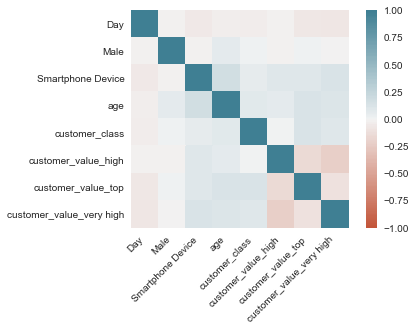

In [165]:
# Final correlation check plotting heatmap

corr = score_d.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

corr

In [166]:
# Convert categorical values to numeric using label encoder

from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

# Encoding the categorical variable
fit = score_d.select_dtypes(include=['object']).fillna('NA').apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    score_d[i] = d[i].transform(score_d[i].fillna('NA'))

## Model deployment

In [167]:
loaded_model = joblib.load('final_model_conversion')
loaded_model

GradientBoostingClassifier()

In [168]:
# Making predictions

features = score_d.loc[:, score_d.columns != 'msisdn']
loaded_model.fit(features_train,label_train)
predictions = loaded_model.predict(features)

# Add a new column to the dataframe with the predictions

score_d.insert(1, "conversion", predictions, True)
score_d

,msisdn,conversion,Day,Male,Smartphone Device,Time,ad_text,age,customer_class,customer_value_high,customer_value_top,customer_value_very high,location_lga,location_state
0,2962,0,23,1,1,749,37,53.000,44.000,0,0,0,504,1
1,354,0,2,1,1,3279,37,48.000,49.000,0,1,0,137,25
2,1619,0,3,1,1,4175,37,33.000,46.000,0,0,0,206,28
3,5880,0,24,1,1,2979,34,46.000,46.000,1,0,0,349,25
4,2310,0,27,1,1,4519,41,39.000,26.000,0,0,0,371,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5994,1563,0,12,0,1,5170,4,49.000,46.000,0,0,1,242,24
5995,3858,0,7,0,1,2708,1,23.000,26.000,0,0,0,13,28
5996,4414,0,4,0,1,3853,1,58.000,49.000,0,0,1,38,25
5997,3932,0,26,1,1,3086,3,25.000,46.000,0,0,0,310,25


## FINAL OUTPUT

In [169]:
installs = score_d.groupby(["msisdn"])["conversion"].sum().sort_values(ascending=False).to_frame()
installs["Probability"] = (installs.apply(lambda x: x/x.sum())*100).round(2)

installs.rename(columns = {'conversion' : 'Result'}, inplace = True)

installs

,Result,Probability
msisdn,,
1501,1,3.450
1645,1,3.450
3596,1,3.450
602,1,3.450
5079,1,3.450
...,...,...
2001,0,0.000
2000,0,0.000
1999,0,0.000
